# Visualise the results of different models

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
TASK_LIST_CLASSIFICATION = [
    "AmazonCounterfactualClassification",
    "AmazonPolarityClassification",
    "AmazonReviewsClassification",
    "Banking77Classification",
    "EmotionClassification",
    "ImdbClassification",
    "MassiveIntentClassification",
    "MassiveScenarioClassification",
    "MTOPDomainClassification",
    "MTOPIntentClassification",
    "ToxicConversationsClassification",
    "TweetSentimentExtractionClassification",
]

TASK_LIST_CLUSTERING = [
    "ArxivClusteringP2P",
    "ArxivClusteringS2S",
    "BiorxivClusteringP2P",
    "BiorxivClusteringS2S",
    "MedrxivClusteringP2P",
    "MedrxivClusteringS2S",
    "RedditClustering",
    "RedditClusteringP2P",
    "StackExchangeClustering",
    "StackExchangeClusteringP2P",
    "TwentyNewsgroupsClustering",
]

TASK_LIST_PAIR_CLASSIFICATION = [
    "SprintDuplicateQuestions",
    "TwitterSemEval2015",
    "TwitterURLCorpus",
]

TASK_LIST_RERANKING = [
    "AskUbuntuDupQuestions",
    "MindSmallReranking",
    "SciDocsRR",
    "StackOverflowDupQuestions",
]

TASK_LIST_RETRIEVAL = [
    "ArguAna",
    "ClimateFEVER",
    "CQADupstackAndroidRetrieval",
    "CQADupstackEnglishRetrieval",
    "CQADupstackGamingRetrieval",
    "CQADupstackGisRetrieval",
    "CQADupstackMathematicaRetrieval",
    "CQADupstackPhysicsRetrieval",
    "CQADupstackProgrammersRetrieval",
    "CQADupstackStatsRetrieval",
    "CQADupstackTexRetrieval",
    "CQADupstackUnixRetrieval",
    "CQADupstackWebmastersRetrieval",
    "CQADupstackWordpressRetrieval",
    "DBPedia",
    "FEVER",
    "FiQA2018",
    "HotpotQA",
    "MSMARCO",
    "NFCorpus",
    "NQ",
    "QuoraRetrieval",
    "SCIDOCS",
    "SciFact",
    "Touche2020",
    "TRECCOVID",
]

TASK_LIST_STS = [
    "BIOSSES",
    "SICK-R",
    "STS12",
    "STS13",
    "STS14",
    "STS15",
    "STS16",
    "STS17",
    "STS22",
    "STSBenchmark",
    "SummEval",
]

TASK_LIST = (
    TASK_LIST_CLASSIFICATION
    + TASK_LIST_CLUSTERING
    + TASK_LIST_PAIR_CLASSIFICATION
    + TASK_LIST_RERANKING
    + TASK_LIST_RETRIEVAL
    + TASK_LIST_STS
)

MODEL_LIST = {
    "embed-english-v3.0": "Cohere",
    "angle": "AnglE",
    "text-embedding-3-large": "OpenAI",
    "voyage-2": "Voyage"
}

#### TO-DOs
- change plot_all_models to say average value of models: model1, model2 etc.
- rotate bar graphs so bar are horizontal
- make bars thinner
- optional parameters to control which tasks/models are printed


## Make pandas dataframe

In [17]:
import glob

directory = 'results'

# Get all the .csv file paths in the directory
file_paths = glob.glob(directory + '/*.csv')

dataframes = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(dataframes, ignore_index=True)
df.dropna(subset=['value'], inplace=True)

In [18]:
df['stack_size'] = df['model'].apply(lambda x: x.count('$') + 1)
df = df[df['model'] != 'basic_huggingface']
df = df.sort_values(by='stack_size')
df['value'] = df['value'].apply(lambda x: round(x, 5))

In [19]:
print("The tasks that were tested are:")
tasks_list = df['task'].unique()
print(tasks_list)

# Remove the STS average value (to reduce confusion)
df = df[df['dataset'] != 'average']

print("The datasets that were tested are:")
datasets_list = df['dataset'].unique()
print(datasets_list)


The tasks that were tested are:
['STS' 'Classification' 'Clustering' 'PairClassification' 'Reranking'
 'Retrieval']
The datasets that were tested are:
['STSBenchmark' 'MTOPIntentClassification'
 'ToxicConversationsClassification'
 'TweetSentimentExtractionClassification' 'ArxivClusteringS2S'
 'BiorxivClusteringS2S' 'MedrxivClusteringP2P' 'MedrxivClusteringS2S'
 'RedditClustering' 'StackExchangeClustering' 'StackExchangeClusteringP2P'
 'TwentyNewsgroupsClustering' 'SprintDuplicateQuestions' 'STS22'
 'TwitterSemEval2015' 'AskUbuntuDupQuestions' 'SciDocsRR'
 'StackOverflowDupQuestions' 'ArguAna' 'FiQA2018' 'NFCorpus' 'SCIDOCS'
 'MTOPDomainClassification' 'SciFact' 'MassiveScenarioClassification'
 'ImdbClassification' 'MassiveIntentClassification'
 'EmotionClassification' 'Banking77Classification'
 'AmazonReviewsClassification' 'AmazonCounterfactualClassification'
 'BIOSSES' 'STS12' 'SICK-R' 'STS13' 'STS14' 'STS15' 'STS16' 'STS17']


In [20]:
print("The llms that were tested are:")
model_list_raw = df['model'].unique()
print(model_list_raw)

The llms that were tested are:
['angle' 'llmrails' 'cohere' 'voyage' 'gist' 'angle$cohere'
 'cohere$voyage' 'angle$llmrails' 'llmrails$voyage' 'gist$voyage'
 'angle$voyage' 'cohere$llmrails' 'gist$llmrails' 'angle$gist'
 'cohere$gist' 'angle$cohere$voyage' 'cohere$gist$llmrails'
 'angle$cohere$llmrails' 'gist$llmrails$voyage' 'cohere$gist$voyage'
 'angle$gist$voyage' 'angle$gist$llmrails' 'angle$cohere$gist'
 'cohere$llmrails$voyage' 'angle$llmrails$voyage']


In [21]:
# Make sure all datasets are tested
count_by_category = df.groupby('dataset').size().reset_index(name='Count')
count_by_category = count_by_category.sort_values(by='Count', ascending=True)
assert count_by_category['Count'].nunique() == 1, "Not all datasets are tested"
count_by_category


dataset  Count
0       AmazonCounterfactualClassification     25
21                                   STS12     25
22                                   STS13     25
23                                   STS14     25
24                                   STS15     25
25                                   STS16     25
26                                   STS17     25
27                                   STS22     25
20                                  SICK-R     25
28                            STSBenchmark     25
30                                 SciFact     25
31                SprintDuplicateQuestions     25
32                 StackExchangeClustering     25
33              StackExchangeClusteringP2P     25
34               StackOverflowDupQuestions     25
35        ToxicConversationsClassification     25
36  TweetSentimentExtractionClassification     25
29                               SciDocsRR     25
37              TwentyNewsgroupsClustering     25
19                                 SCIDOCS     25
17                                NFCorpus     25
1              AmazonReviewsClassification     25
2                                  ArguAna     25
3                       ArxivClusteringS2S     25
4                    AskUbuntuDupQuestions     25
5                                  BIOSSES     25
6                  Banking77Classification     25
7                     BiorxivClusteringS2S     25
18                        RedditClustering     25
8                    EmotionClassification     25
10                      ImdbClassification     25
11                MTOPDomainClassification     25
12                MTOPIntentClassification     25
13             MassiveIntentClassification     25
14           MassiveScenarioClassification     25
15                    MedrxivClusteringP2P     25
16                    MedrxivClusteringS2S     25
9                                 FiQA2018     25
38                      TwitterSemEval2015     25

## Helper functions

In [22]:
def generate_pairs_of_models(df):
    all__models = df['model'].unique().tolist()
    concat_models = []
    for model in all__models:
        if '$' in model:
            concat_models.append(model)

    model_lists = []
    for model in concat_models:
        lst = model.split('$')
        lst.append(model)
        model_lists.append(lst)

    df_list = []
    for model_list in model_lists:
        df_list.append(df[df['model'].isin(model_list)])

    return df_list

df_list = generate_pairs_of_models(df)
    

In [23]:
from prettytable import PrettyTable
def generate_table(scores, improvement_str):
    table = PrettyTable(["Number of models", "Models", improvement_str])

    for concat_score_list in scores:
        concat_score = 0
        other_scores = 0
        llm_count = 0
        concat_model = ""

        for model, score in concat_score_list:
            if '+' in model:
                concat_model = model
                concat_score += score
            else:
                other_scores += score
                llm_count += 1
        
        if concat_model=="":
            continue

        other_scores /= llm_count
        improvement = (concat_score - other_scores)*100


        table.add_row([concat_model.count('+')+1, concat_model, improvement])

    table.reversesort = True
    table.sortby = improvement_str
    print(table)

## Plot bar graphs per group of concat-model and its base models for every task

The cell below generates separate bar graphs of the average values of a concat-model and its base models for every MTEB task.

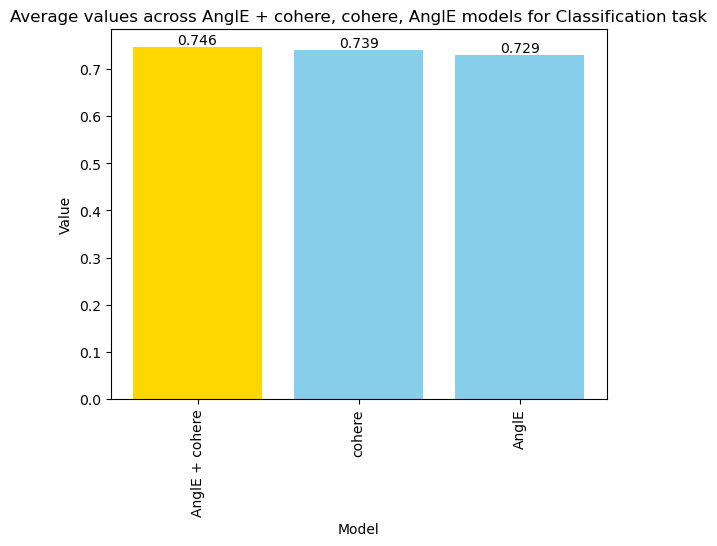

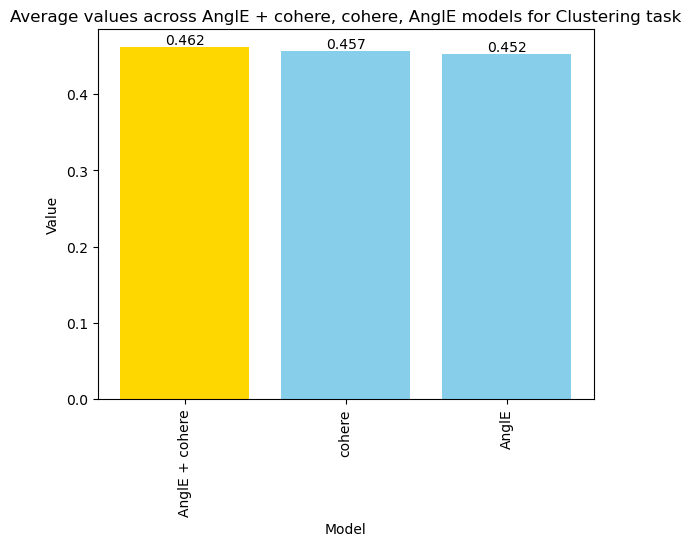

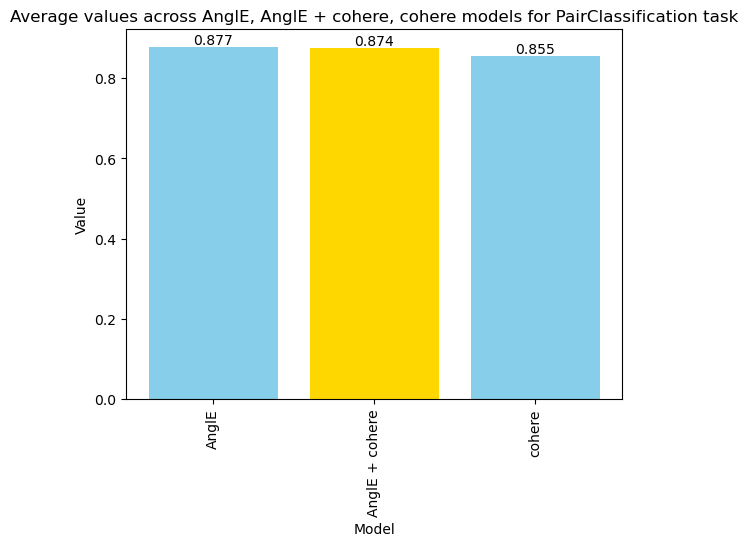

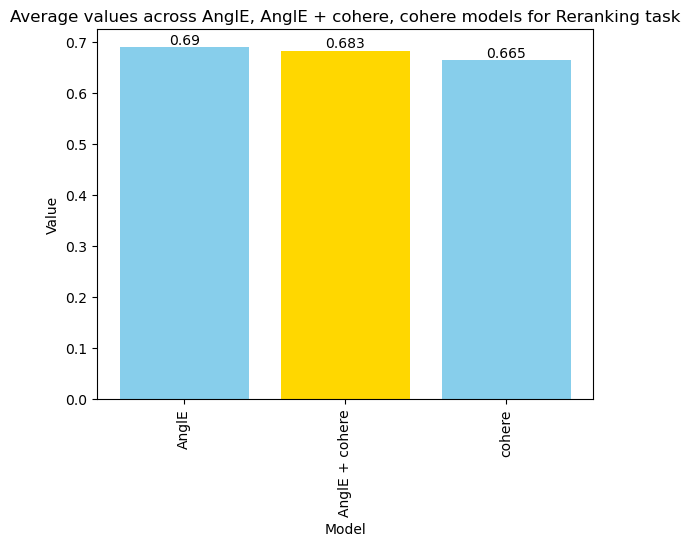

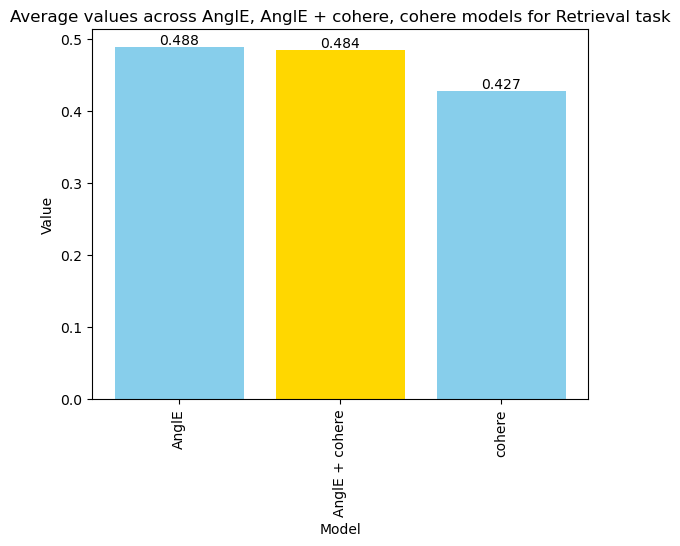

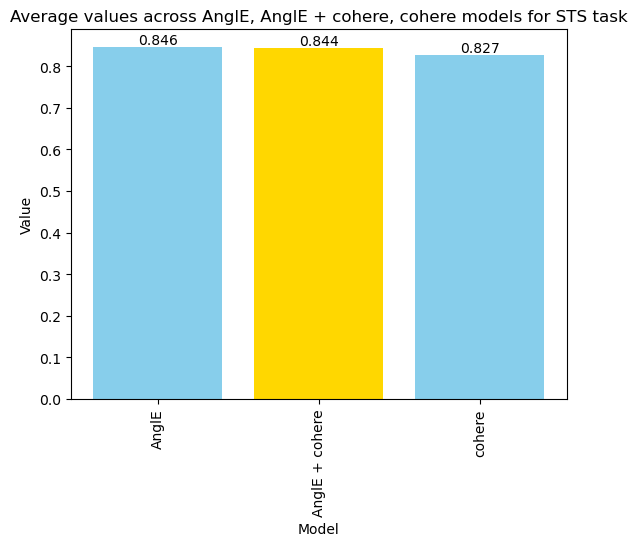

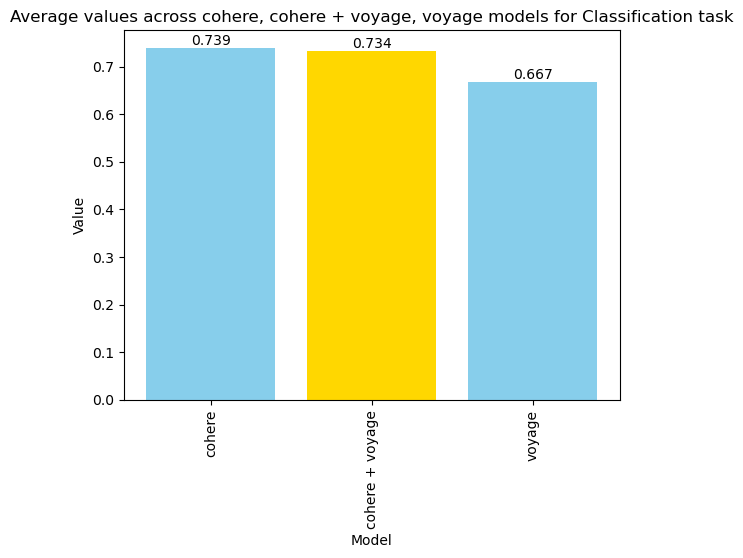

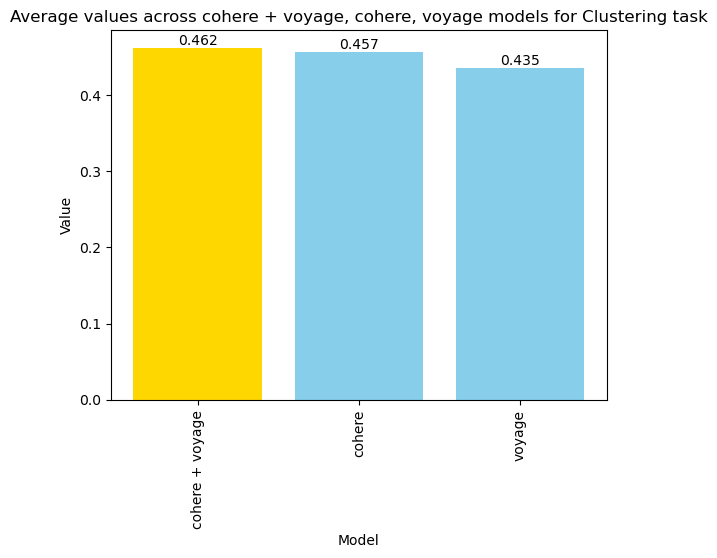

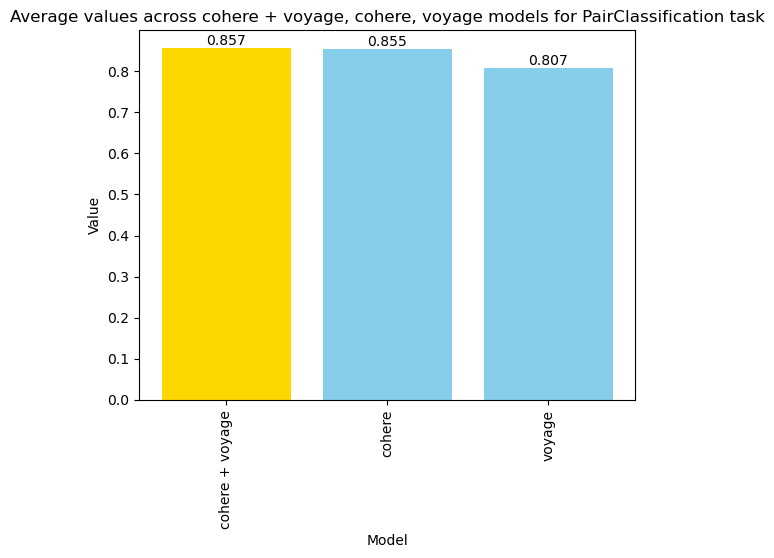

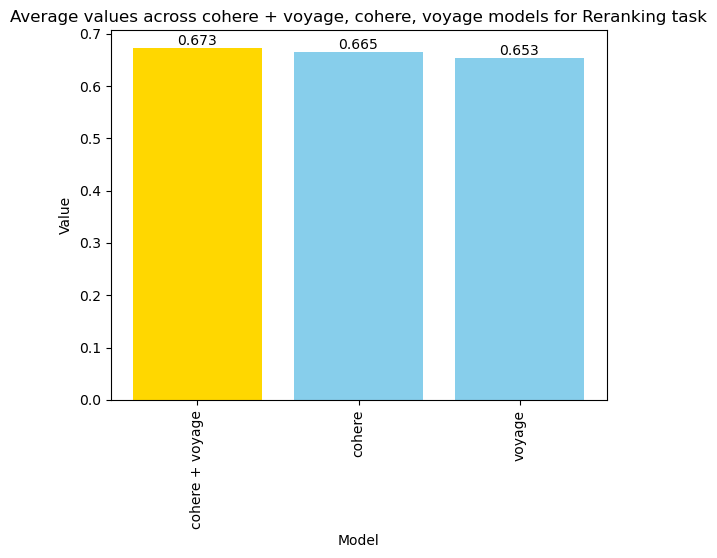

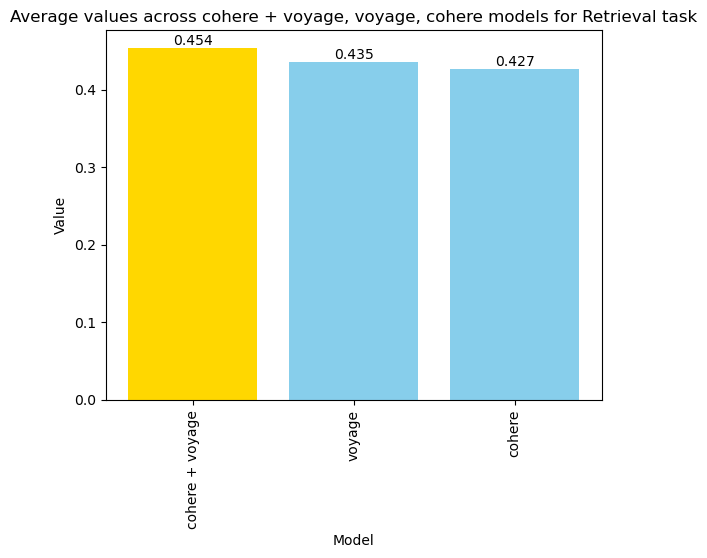

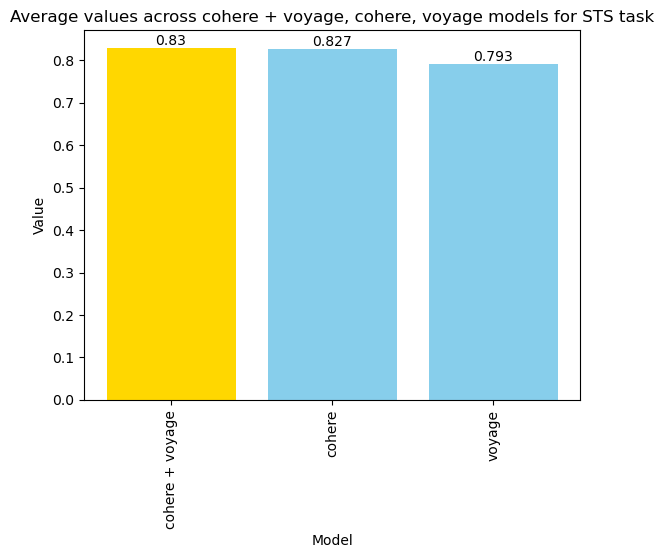

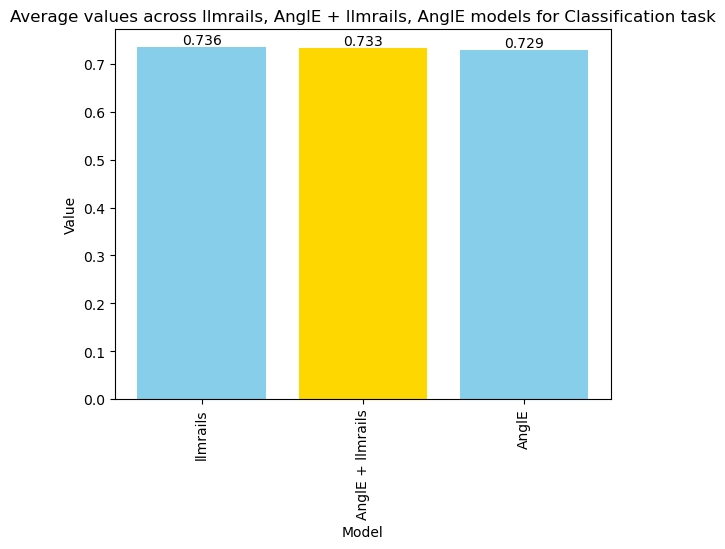

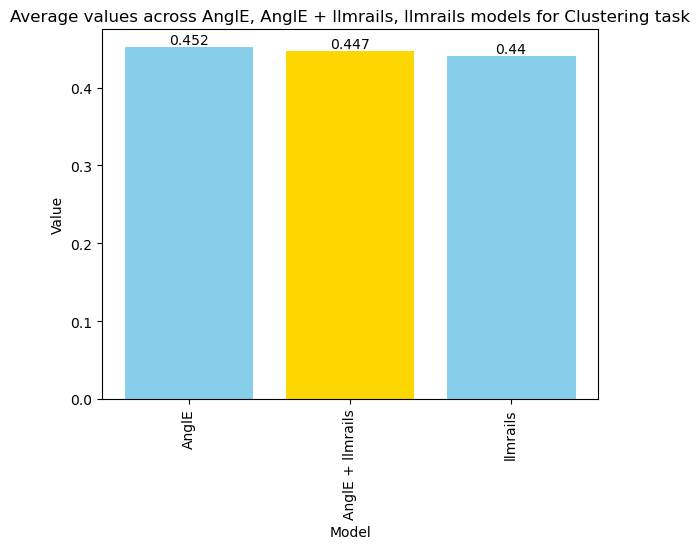

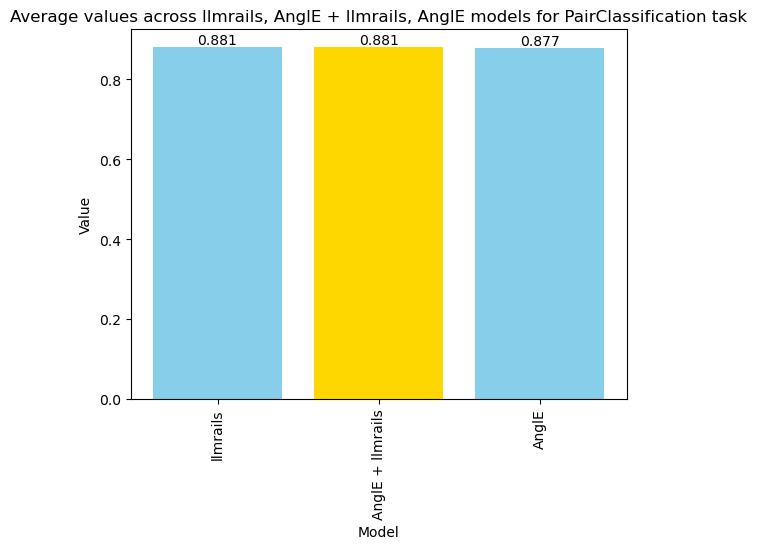

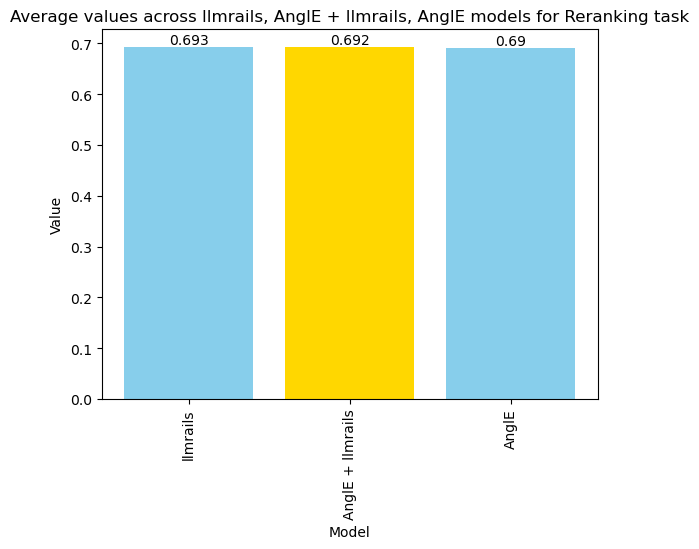

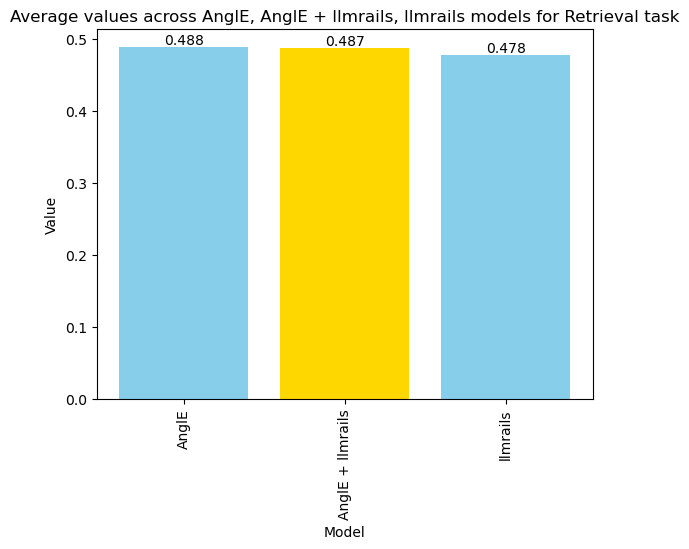

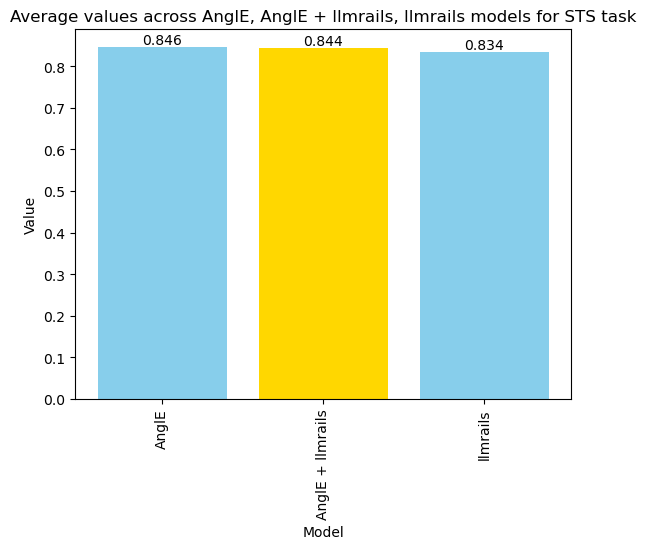

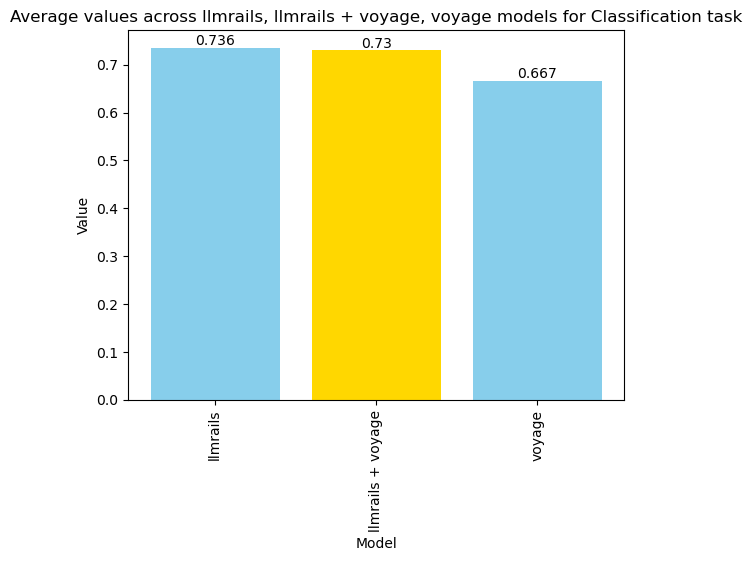

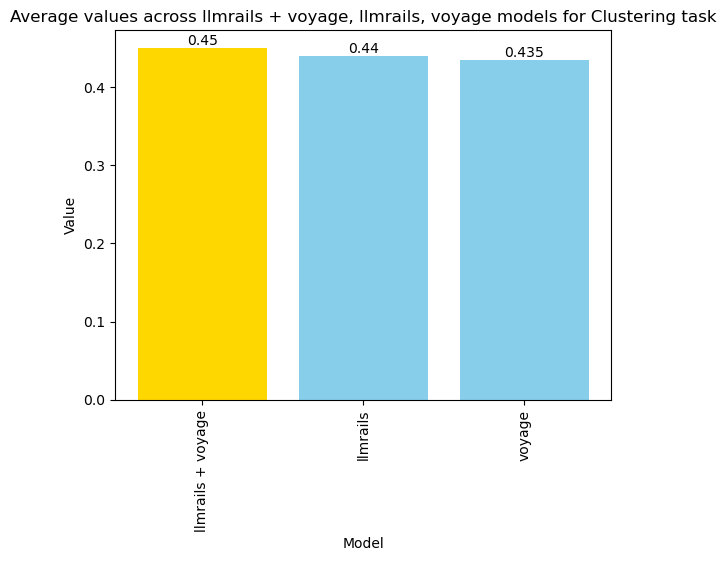

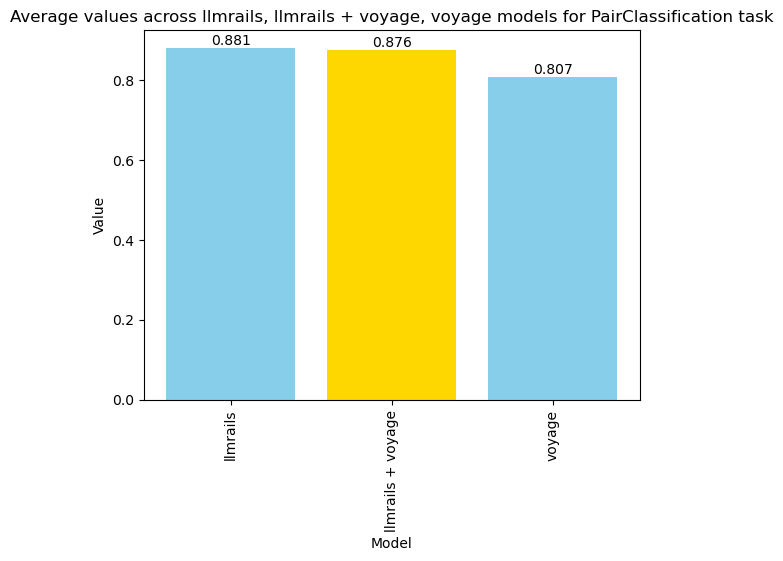

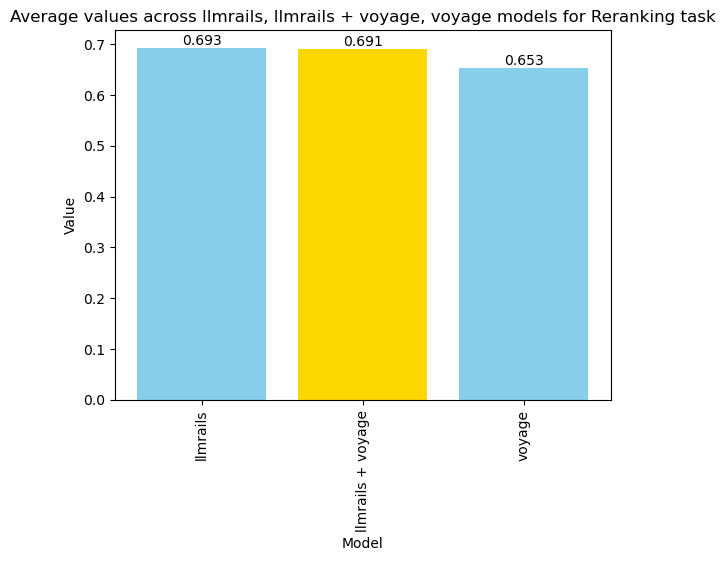

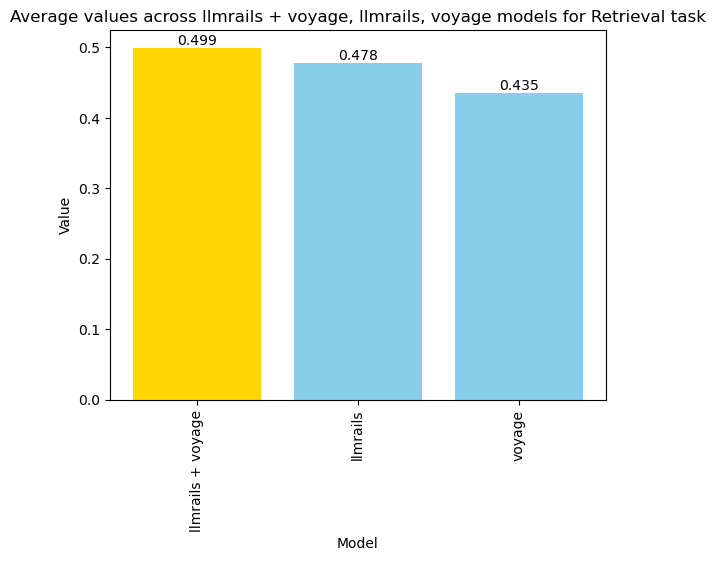

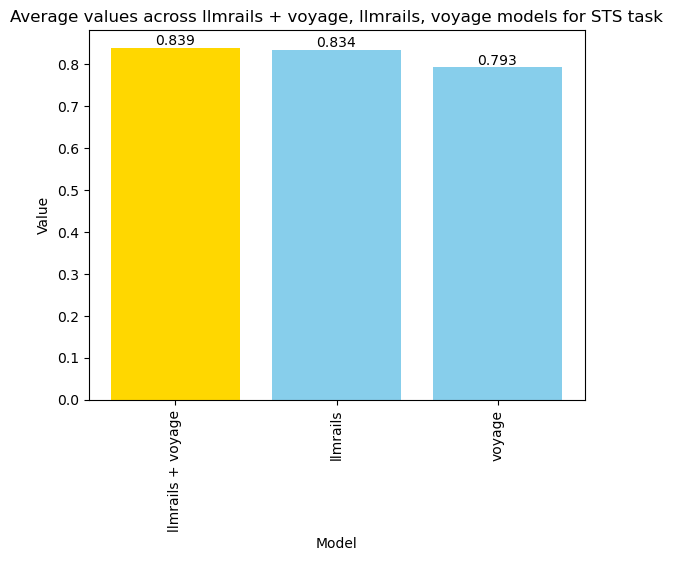

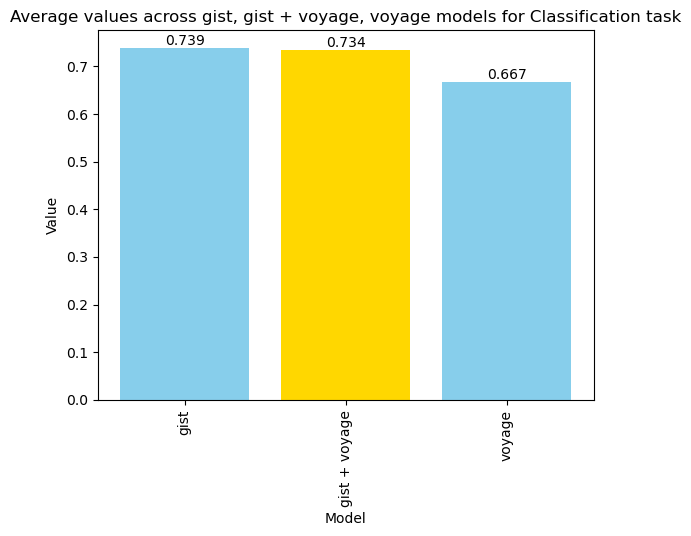

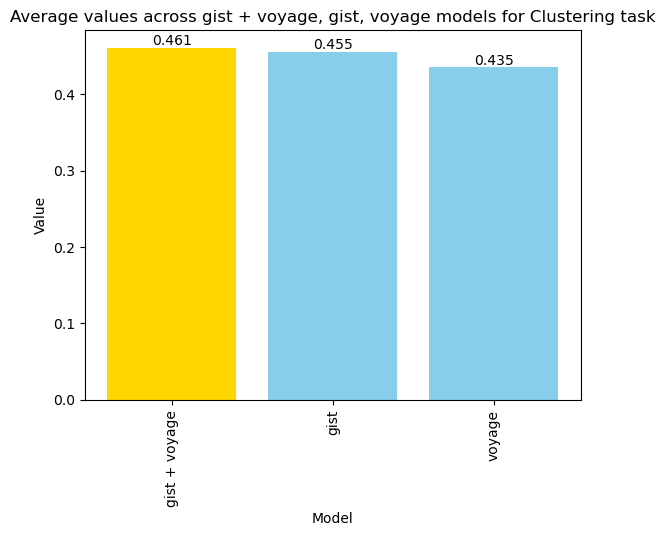

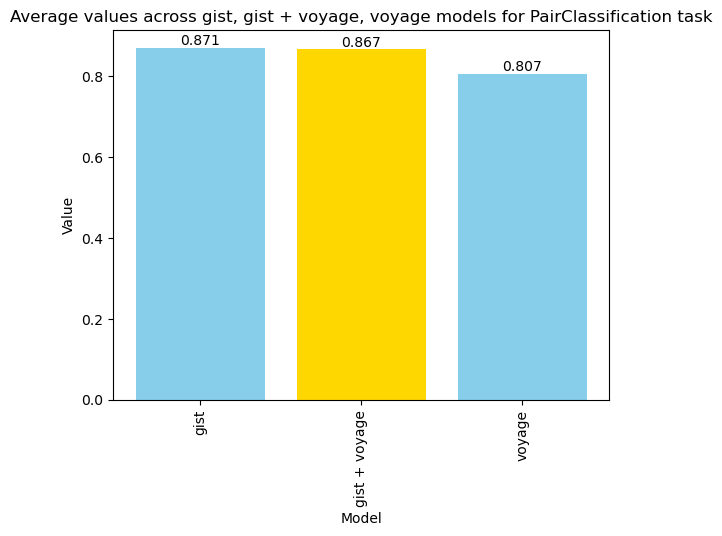

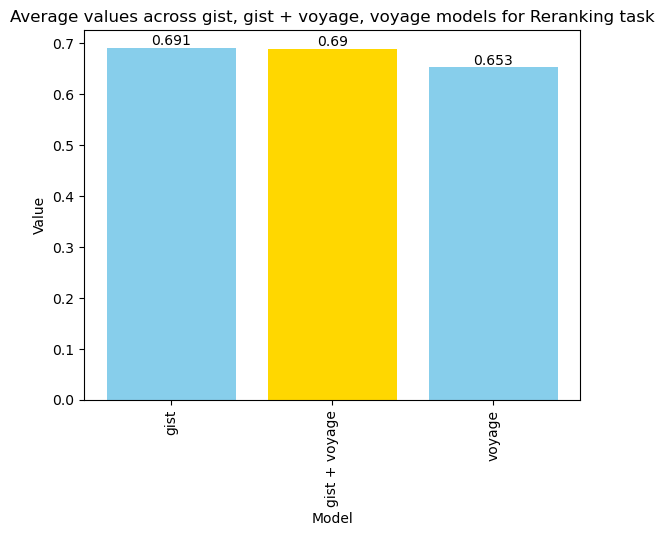

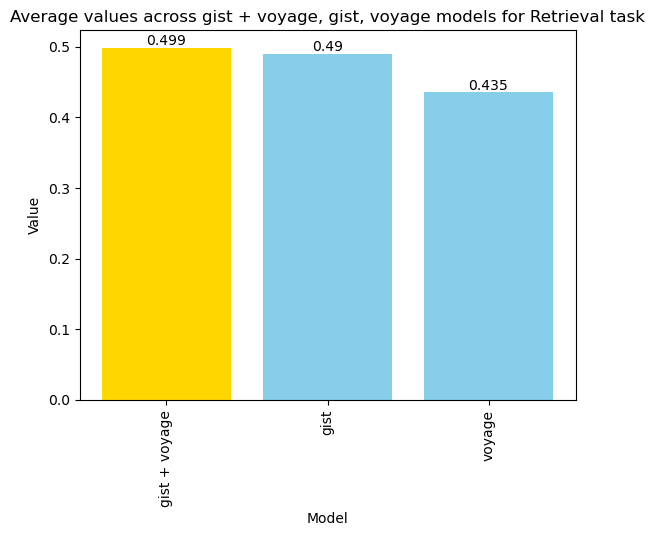

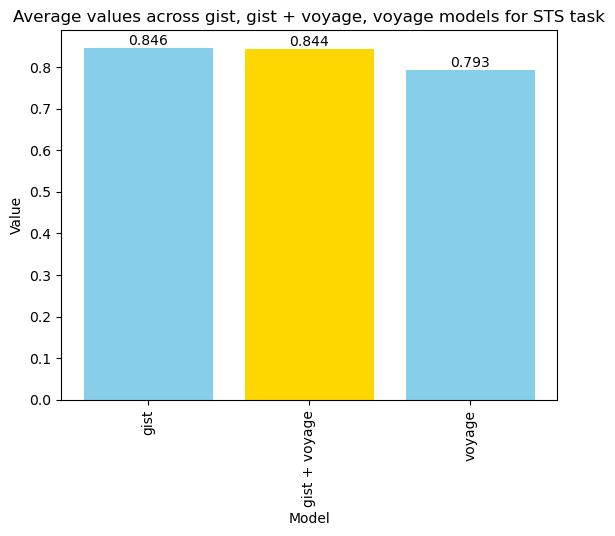

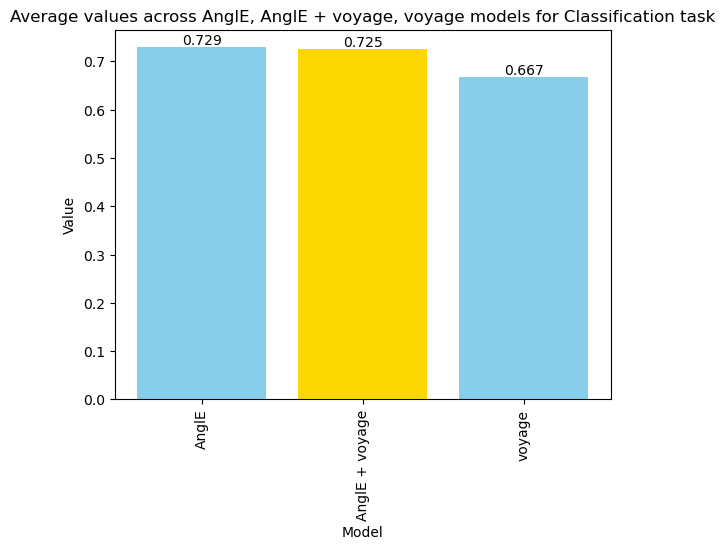

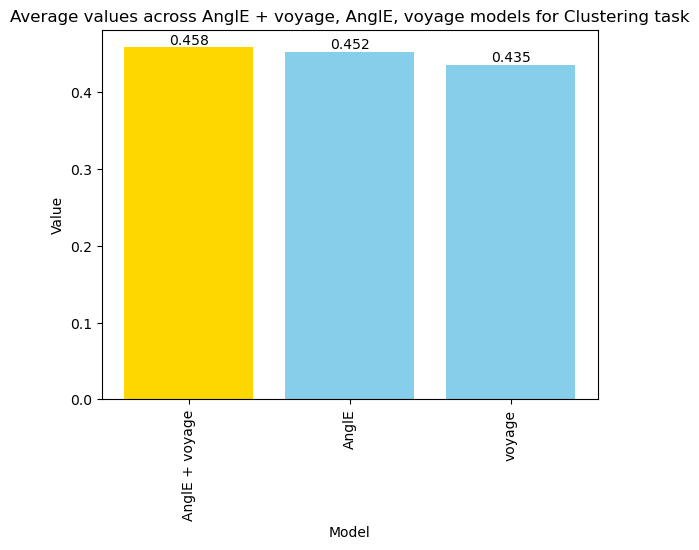

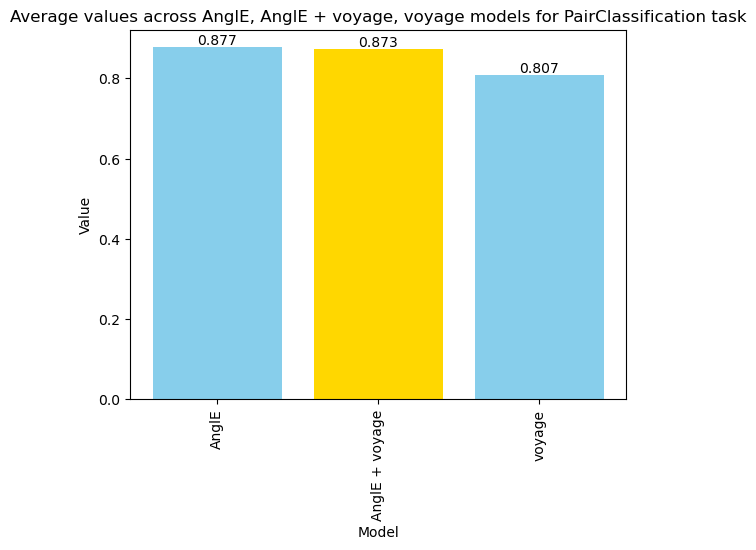

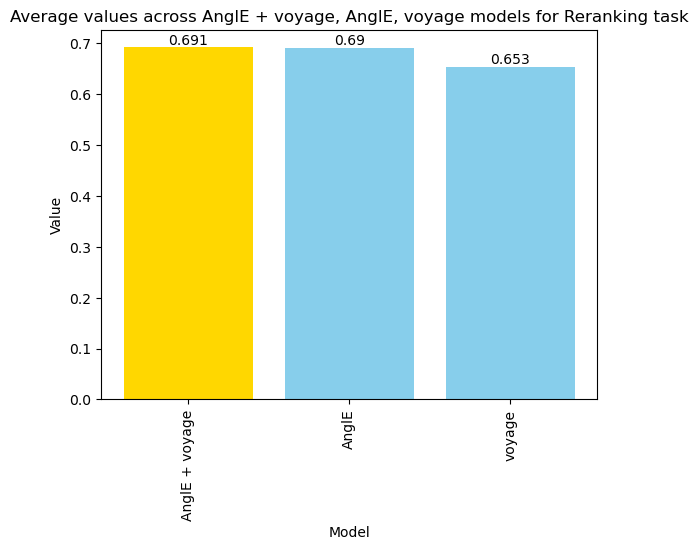

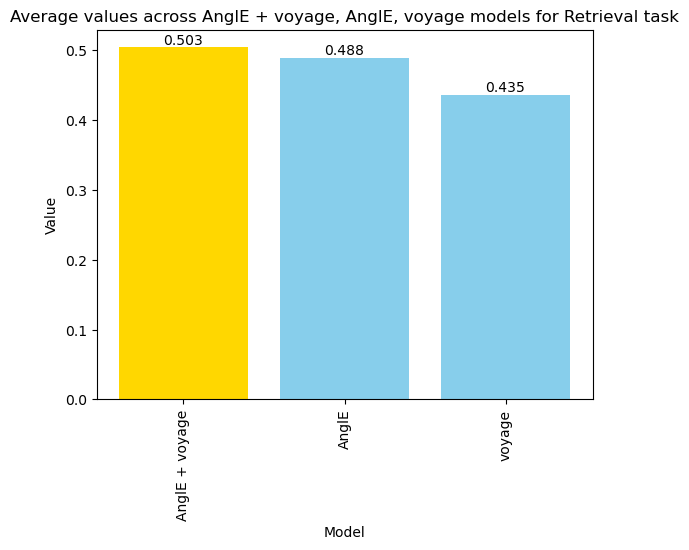

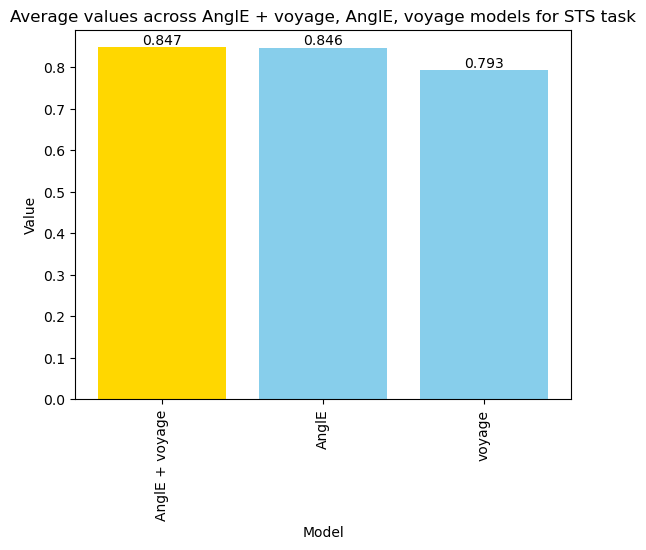

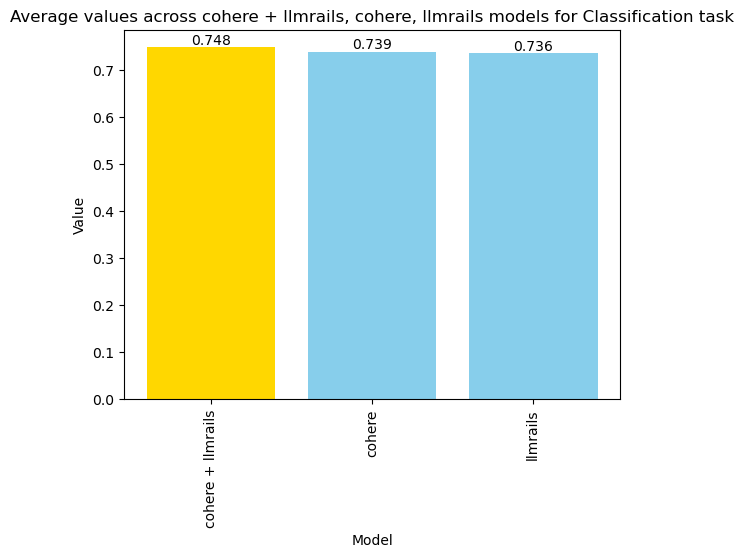

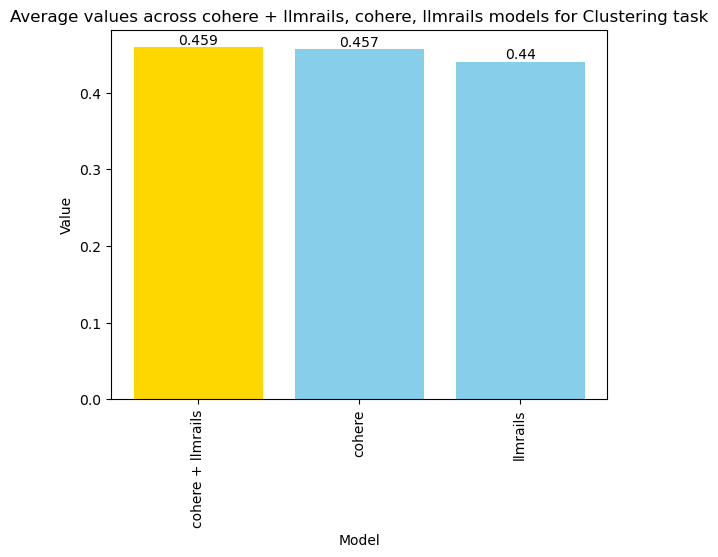

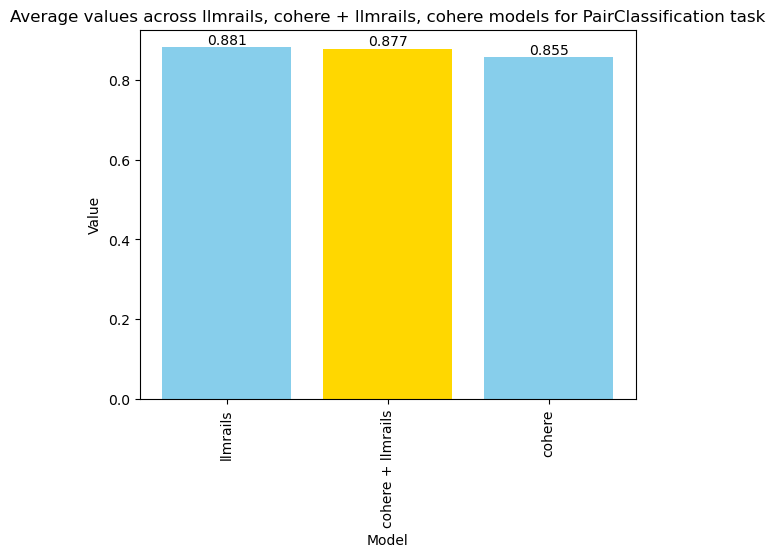

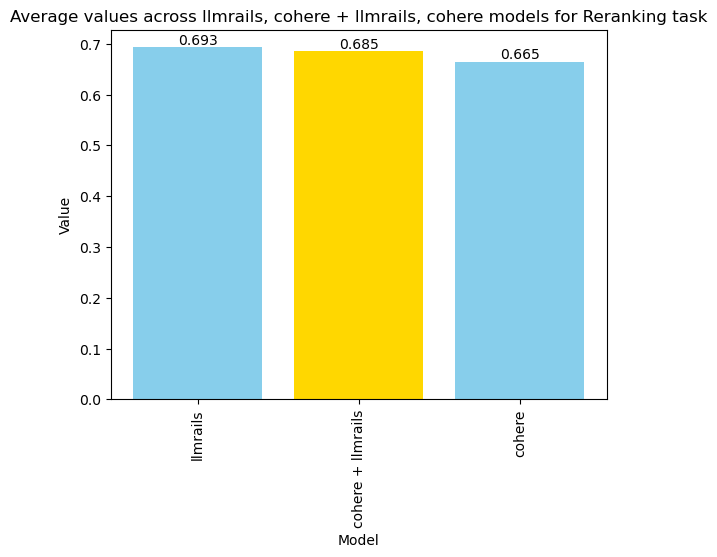

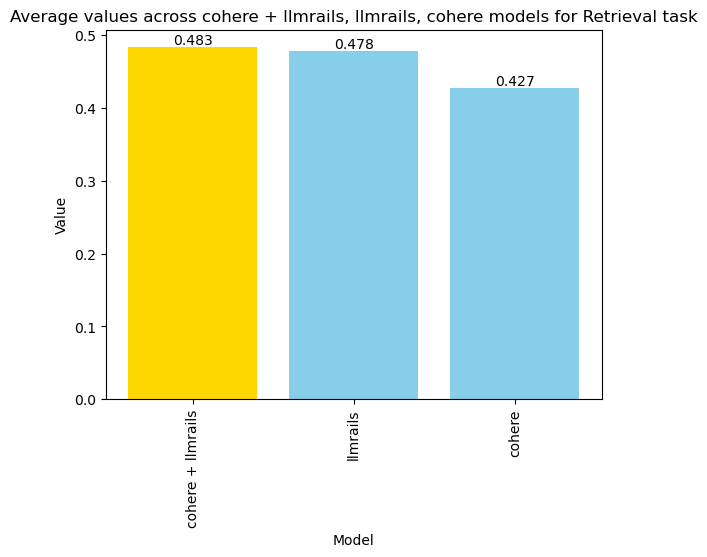

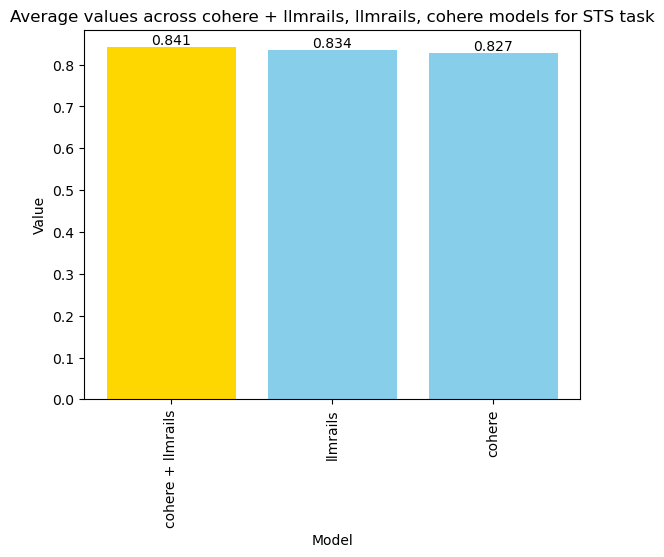

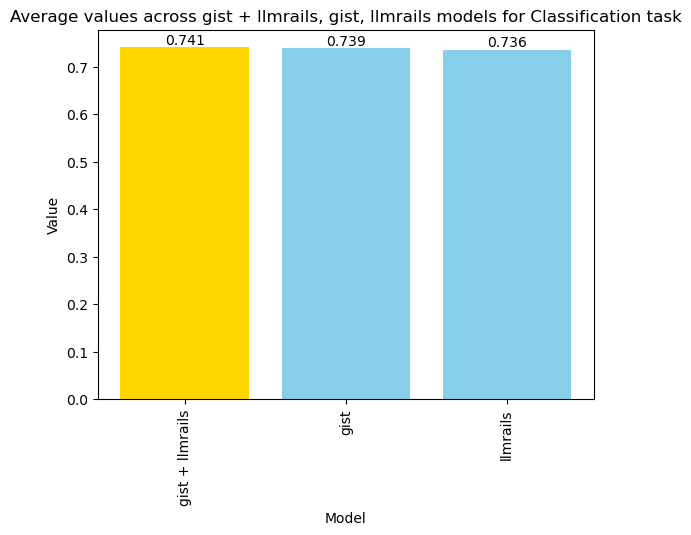

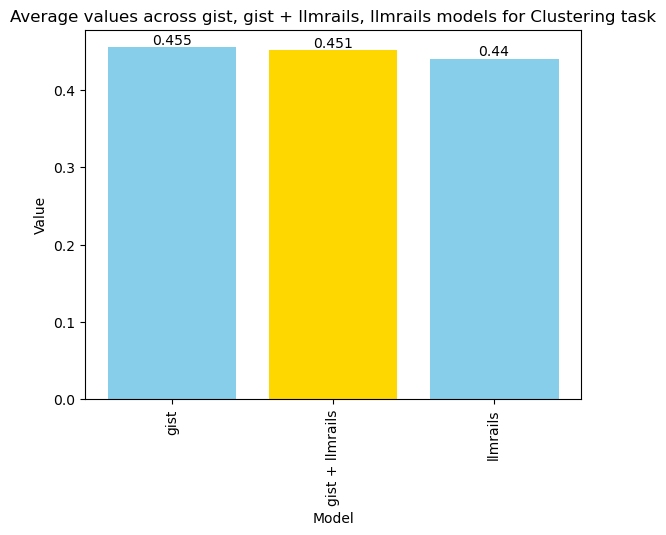

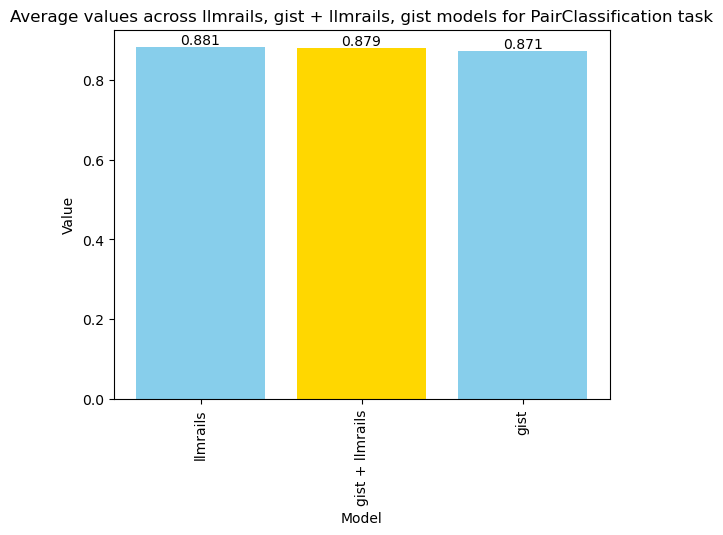

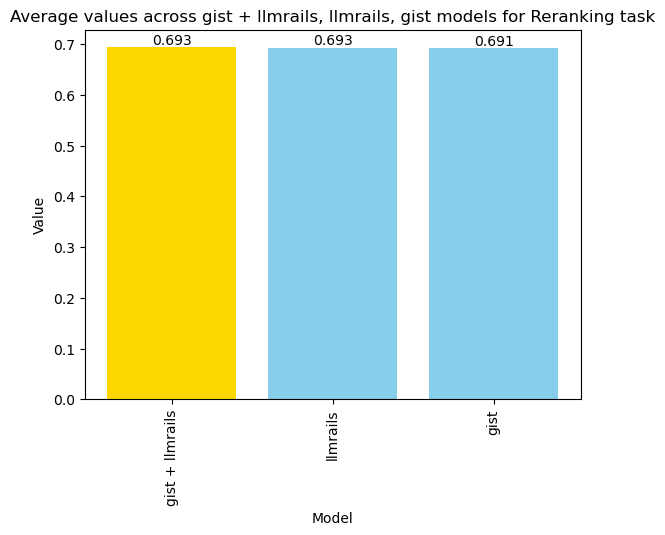

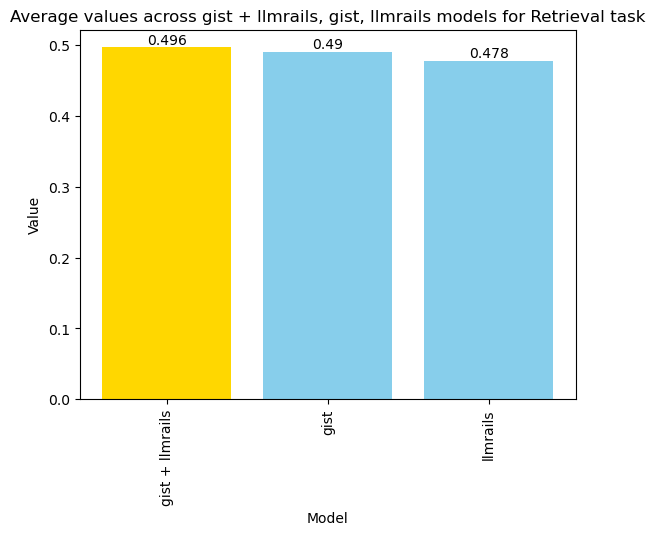

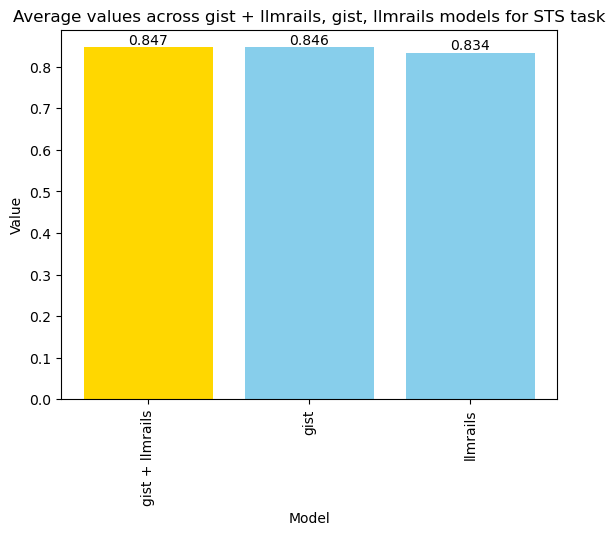

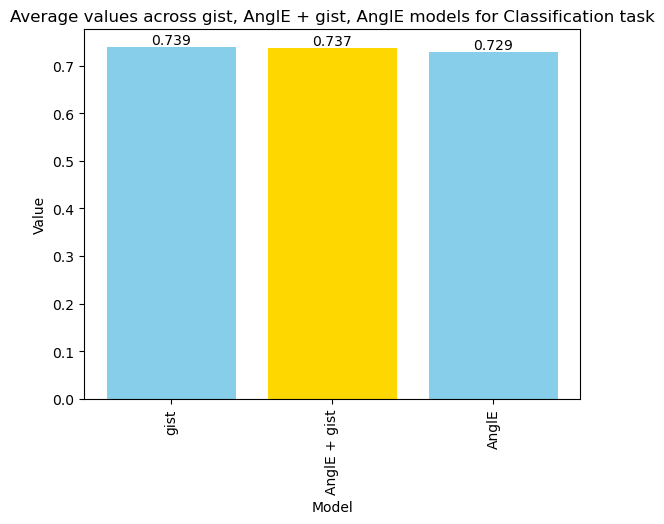

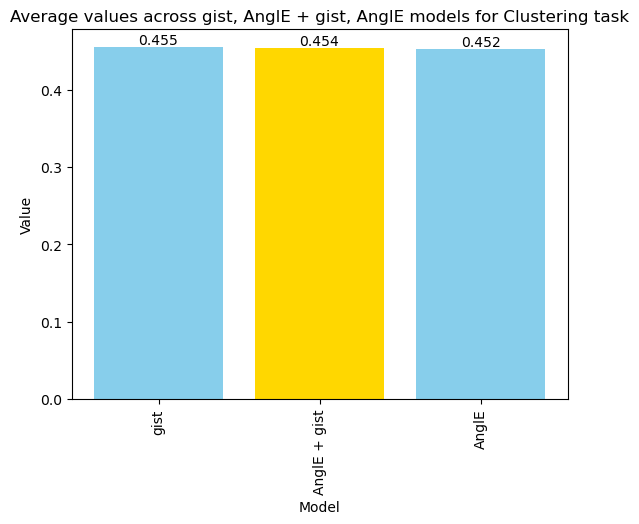

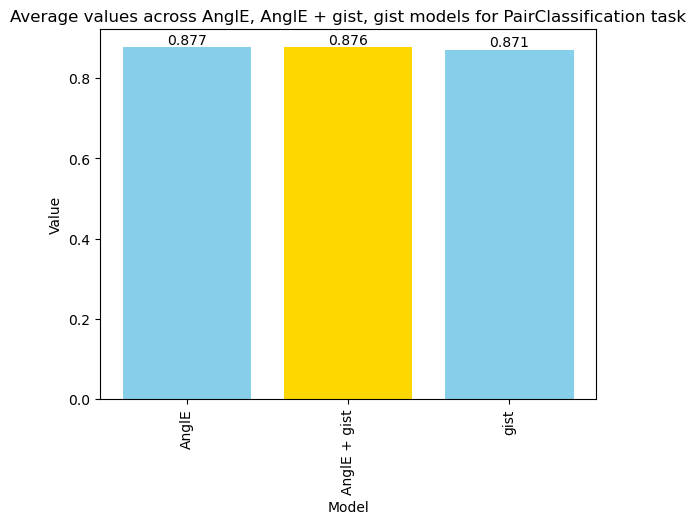

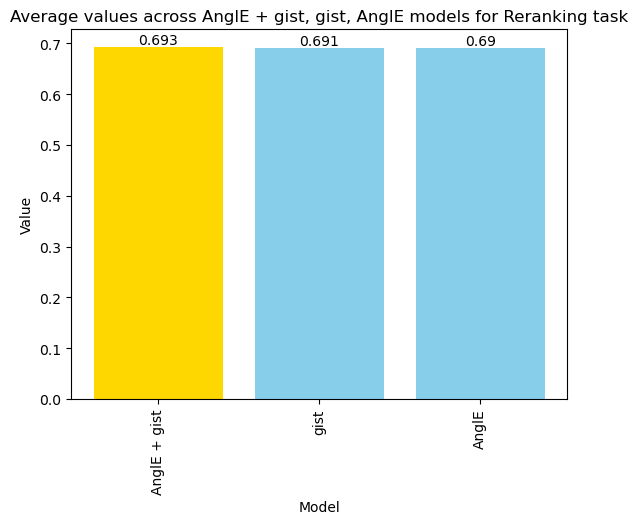

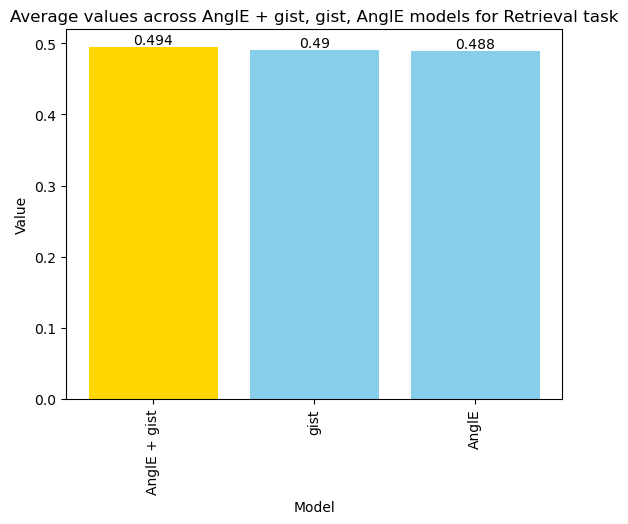

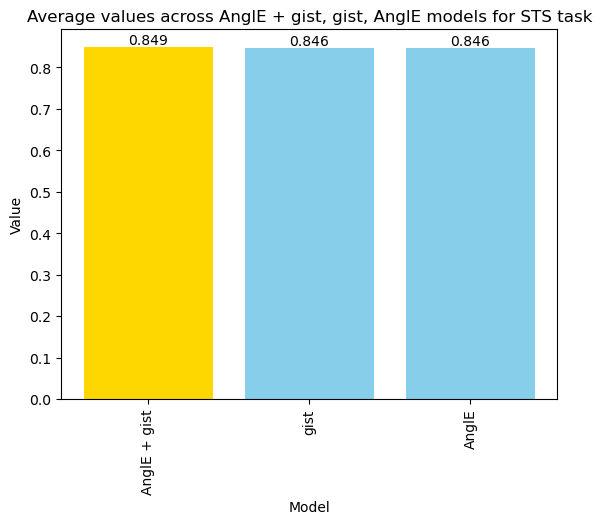

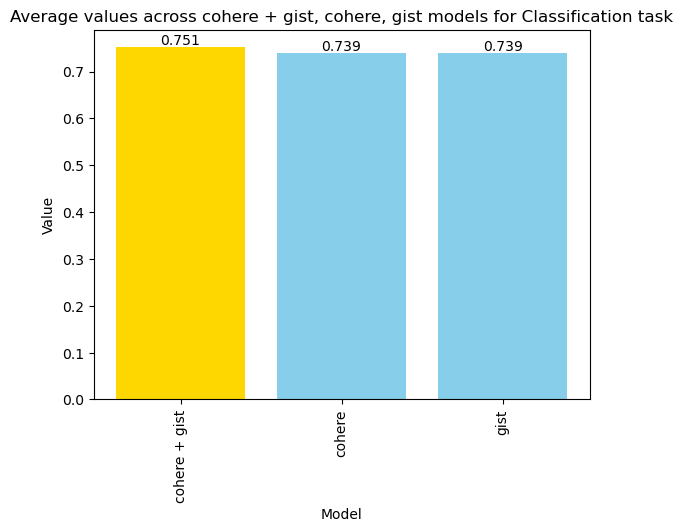

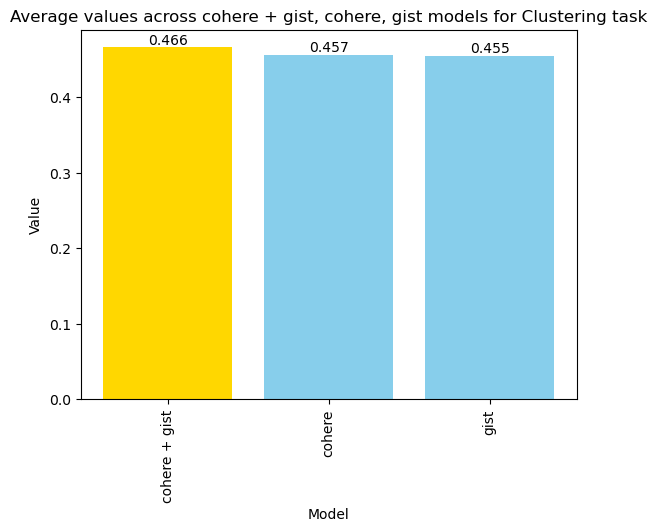

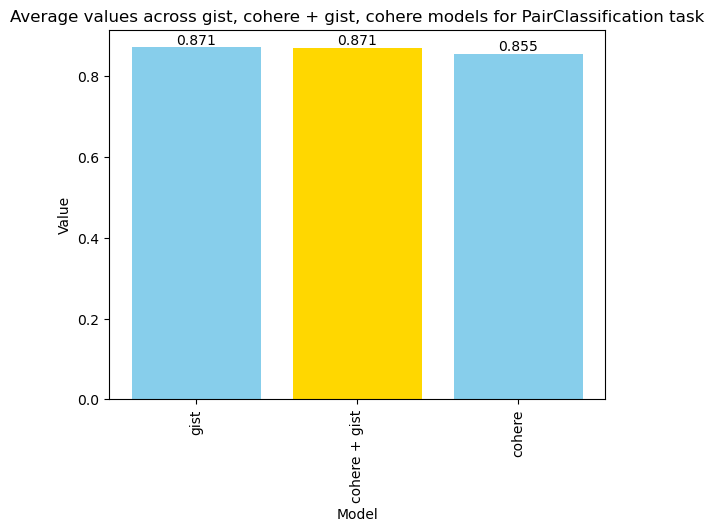

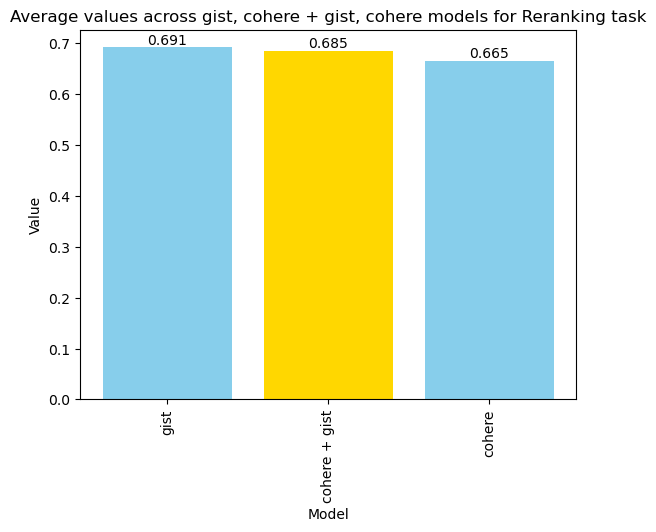

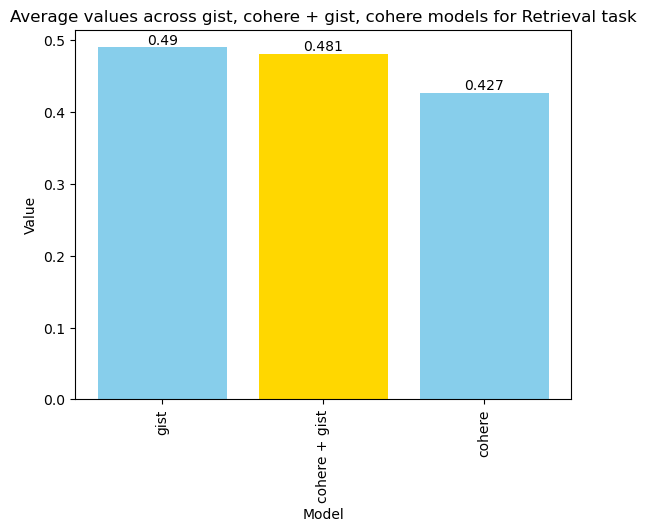

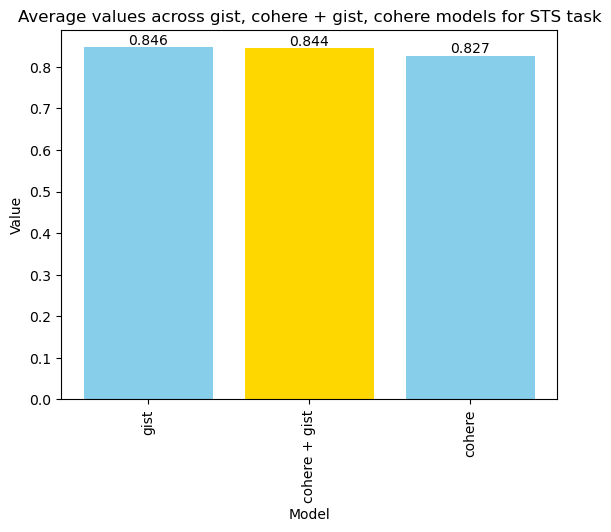

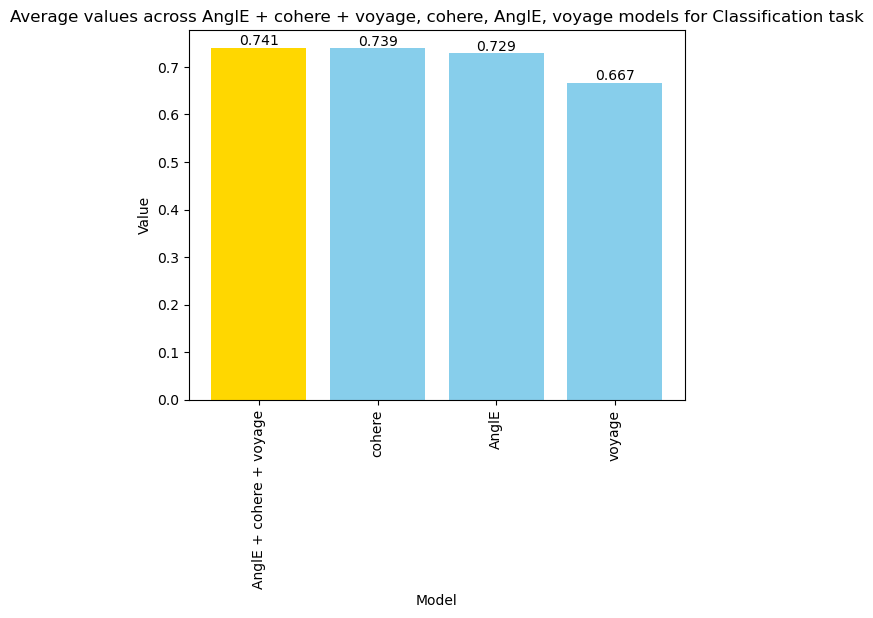

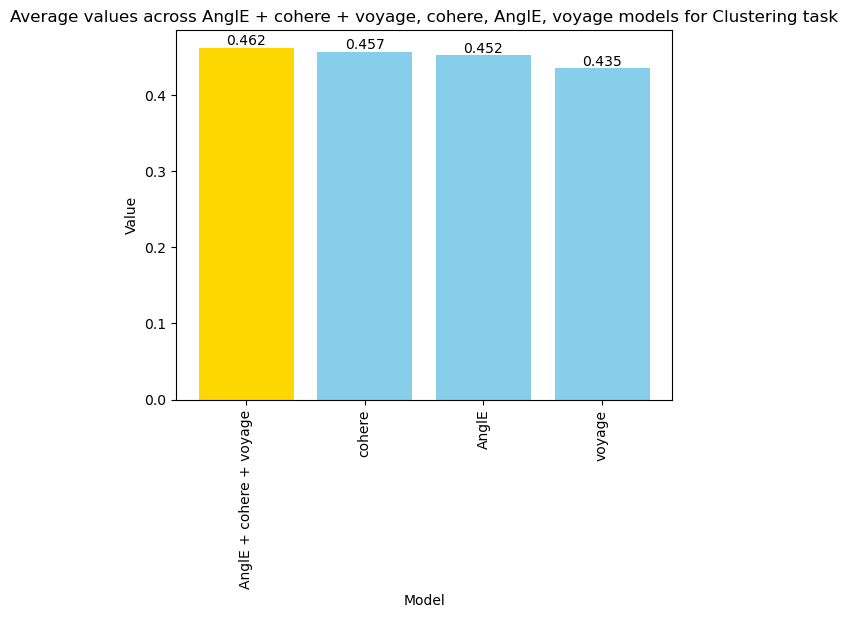

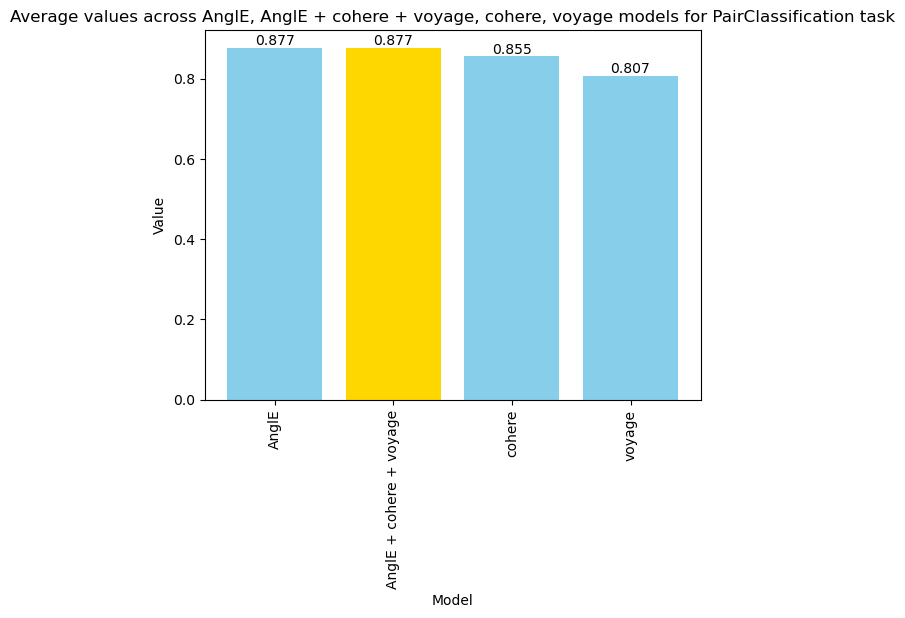

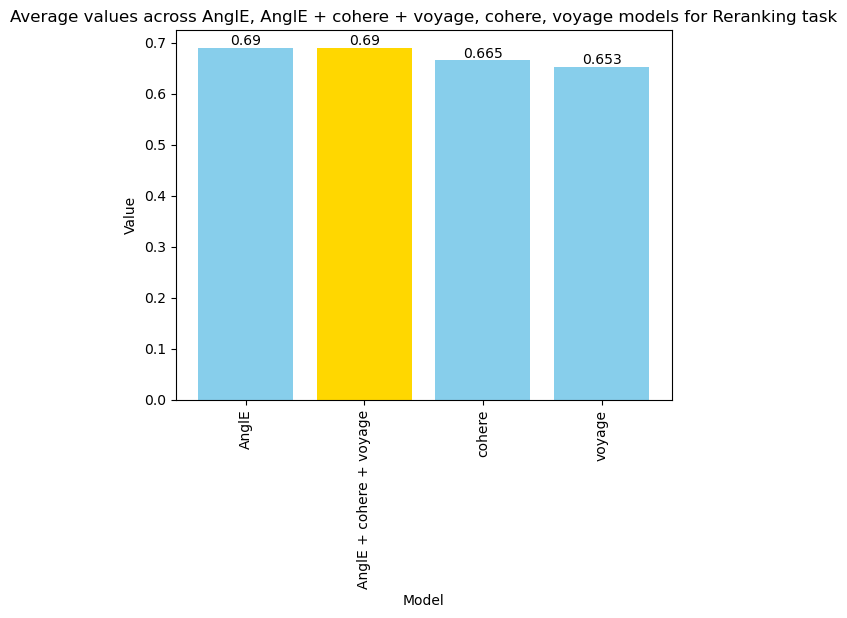

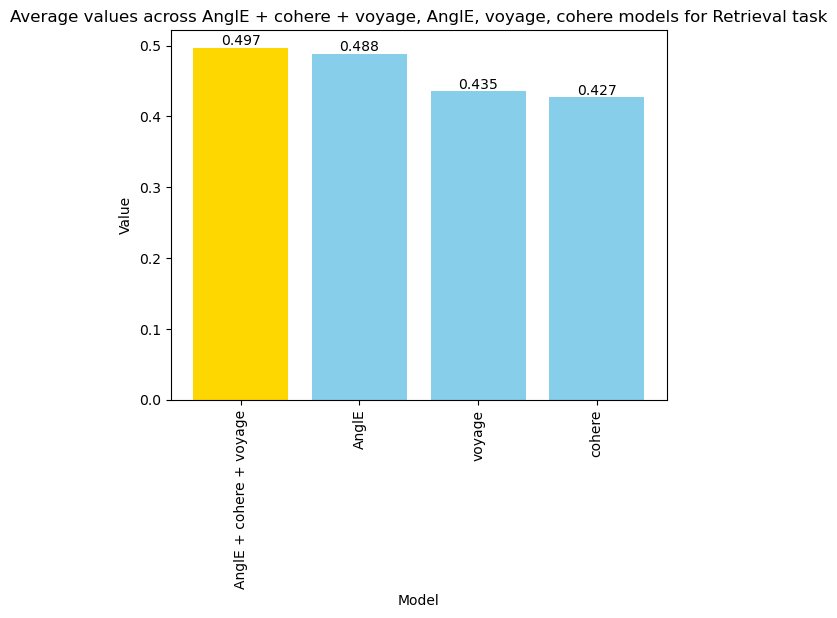

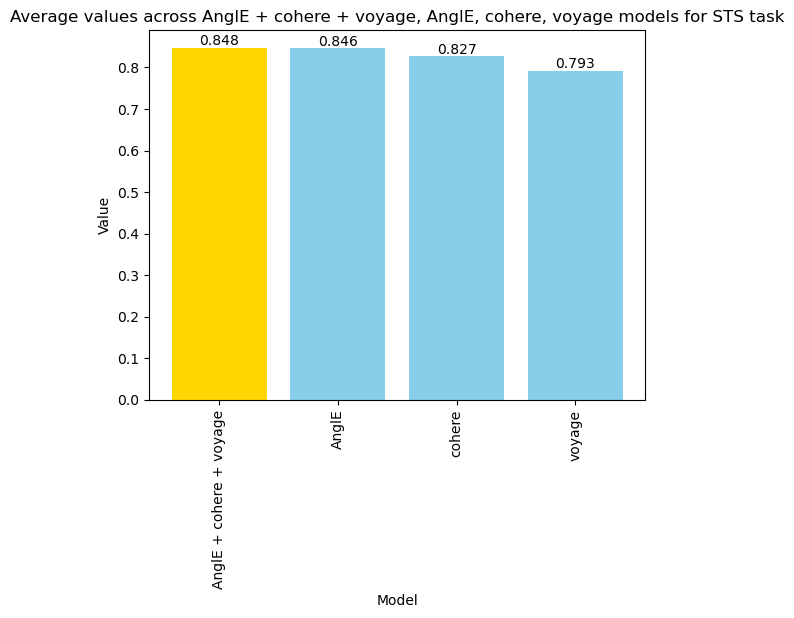

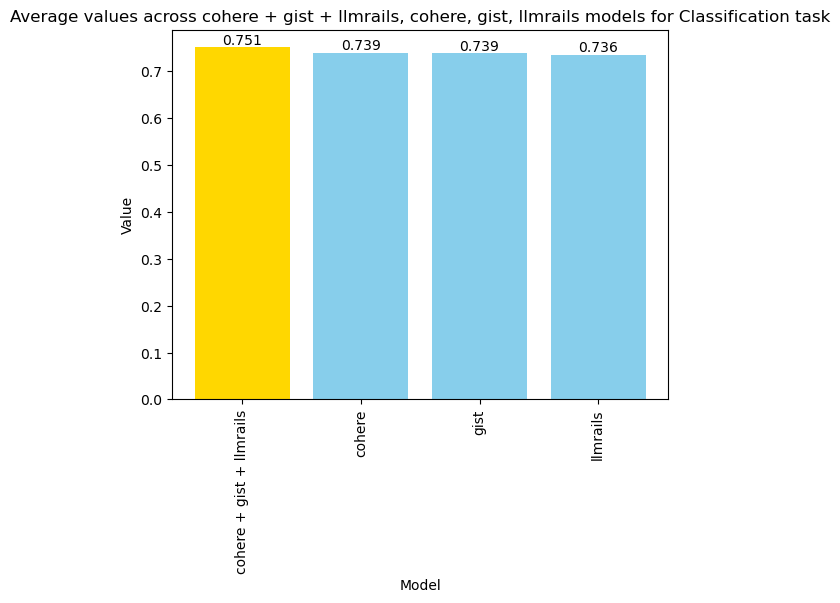

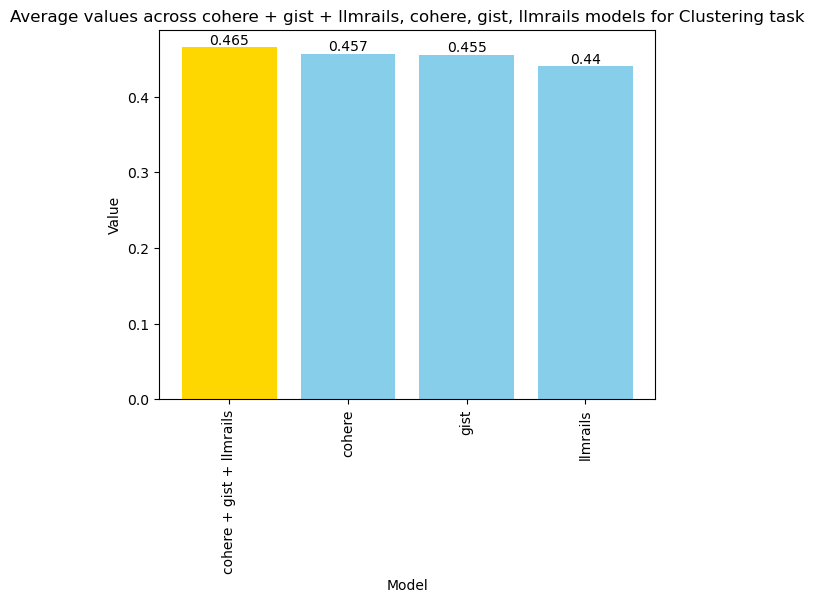

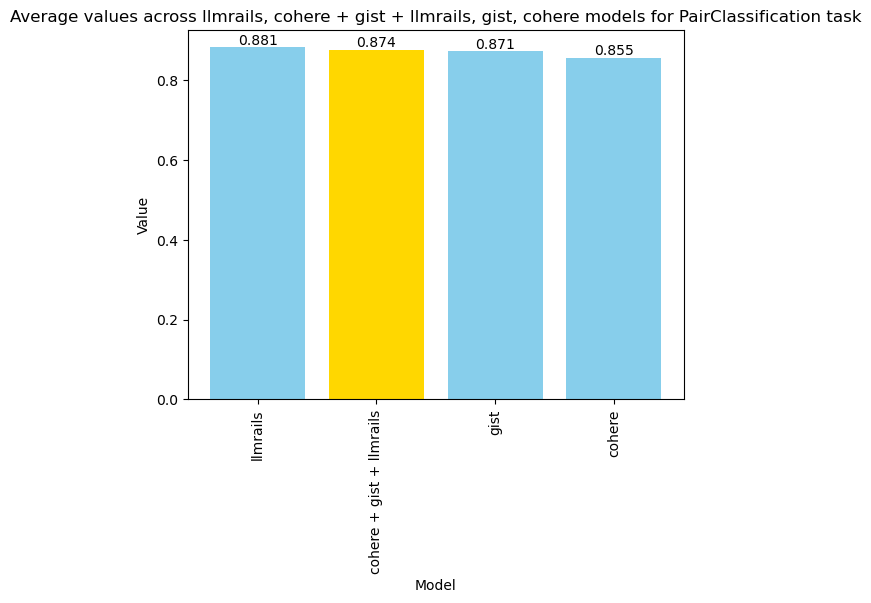

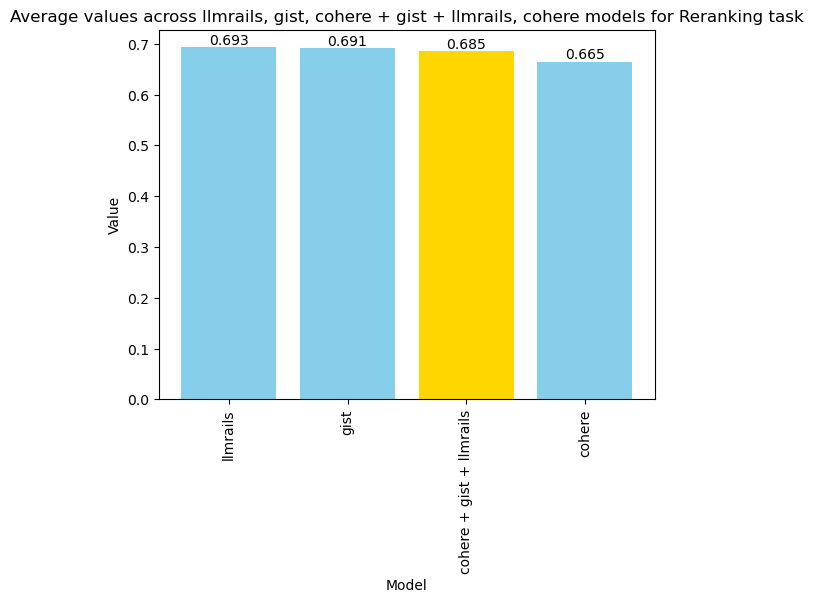

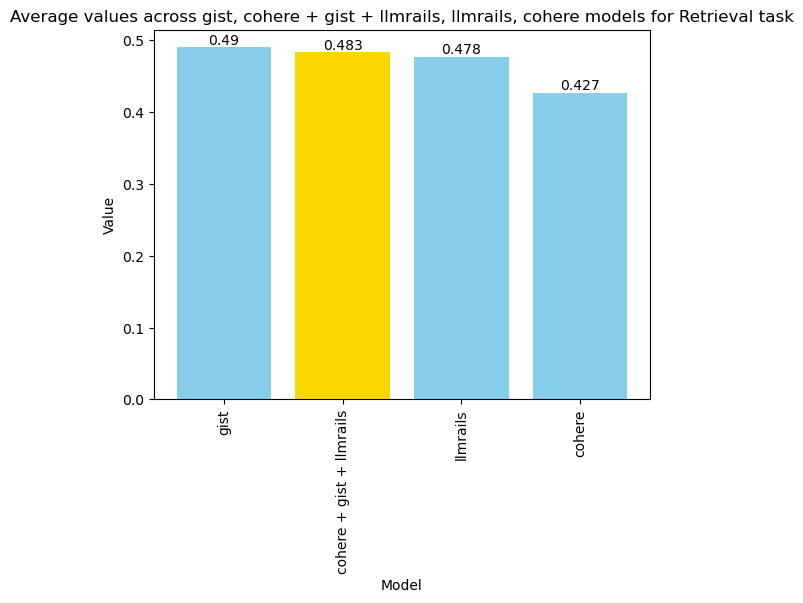

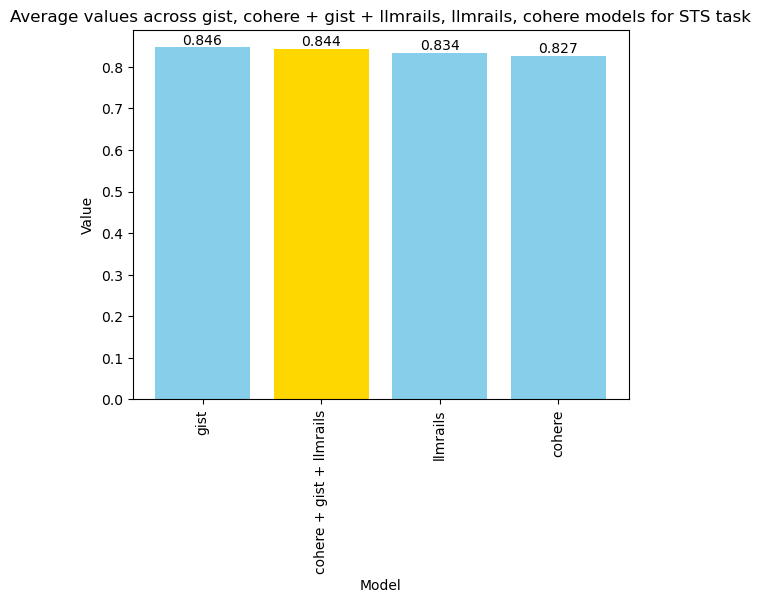

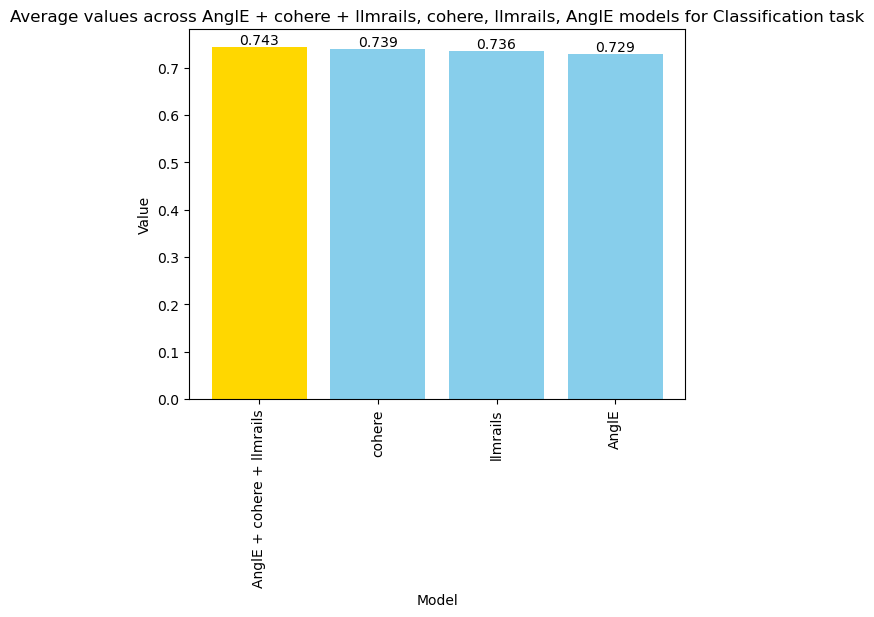

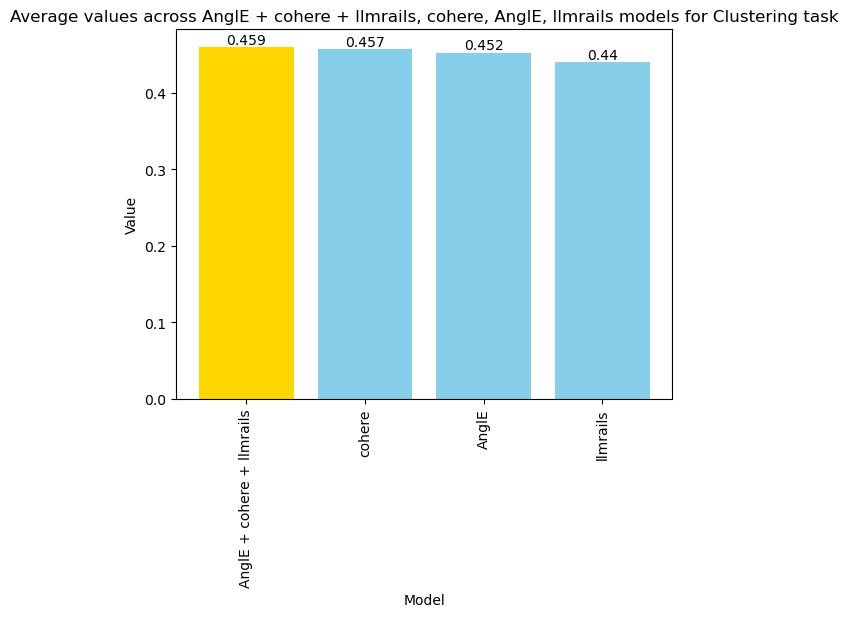

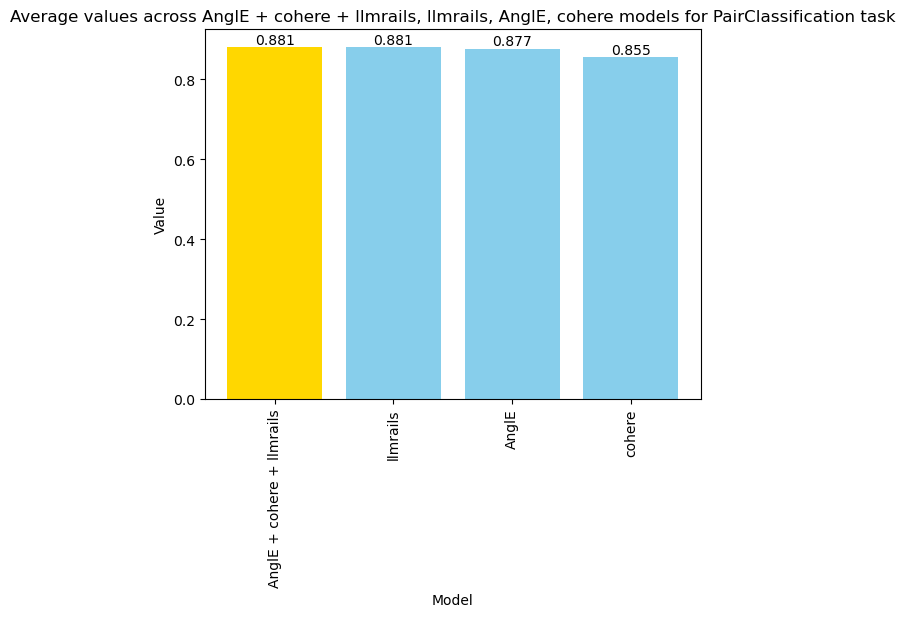

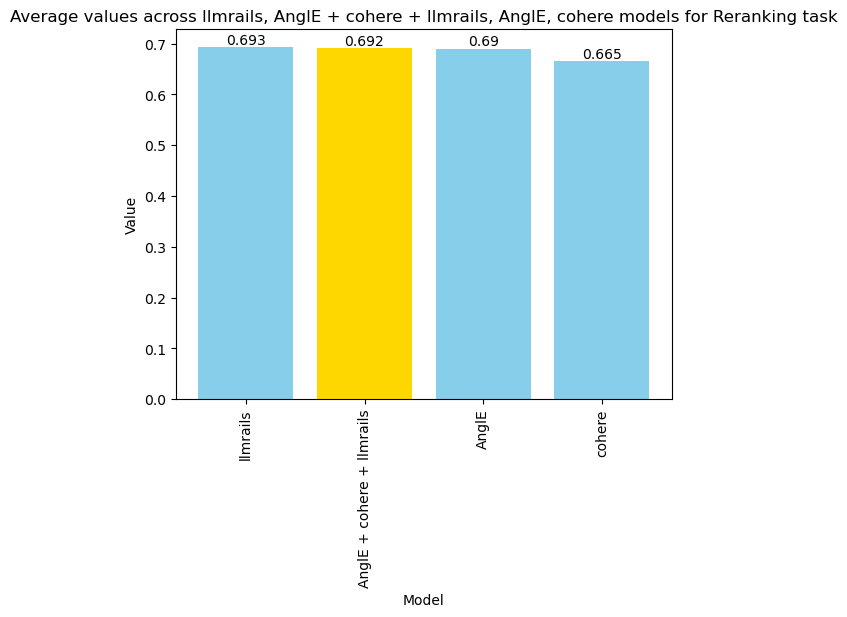

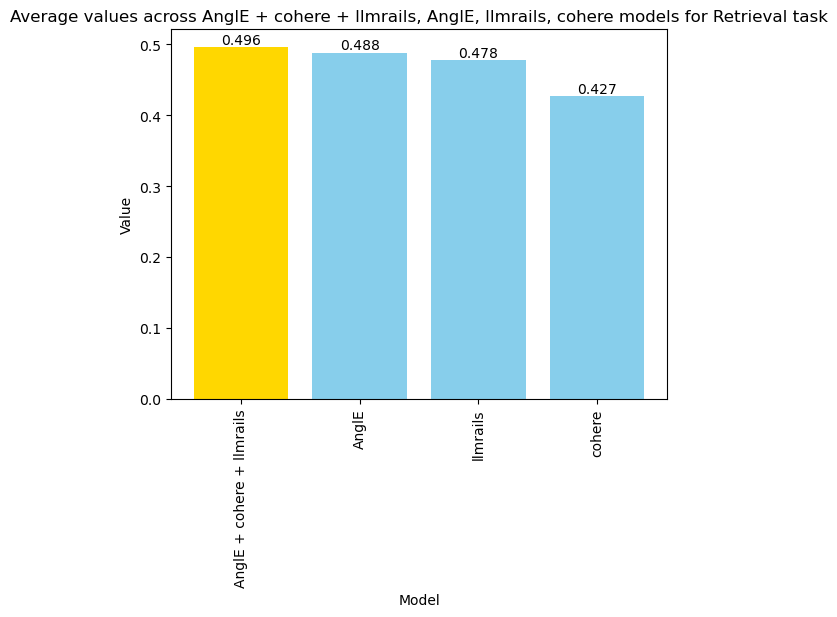

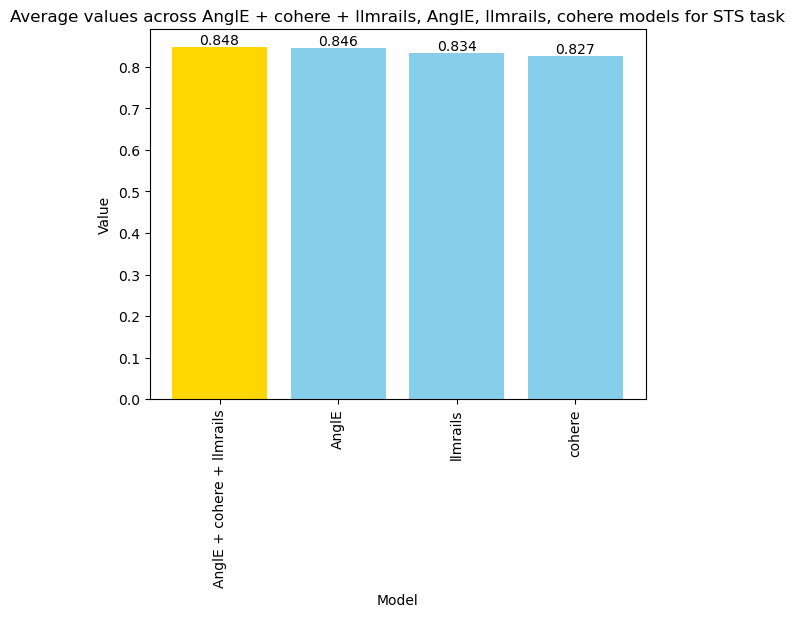

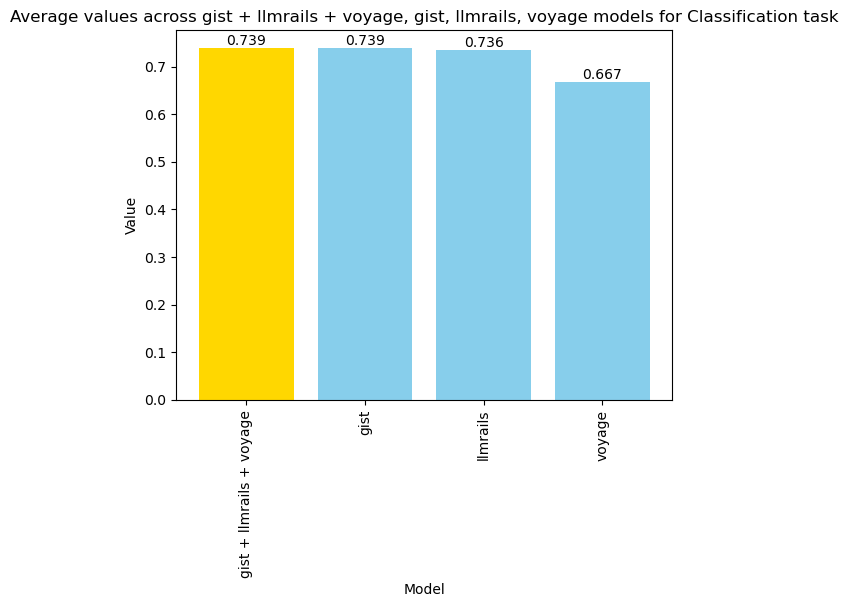

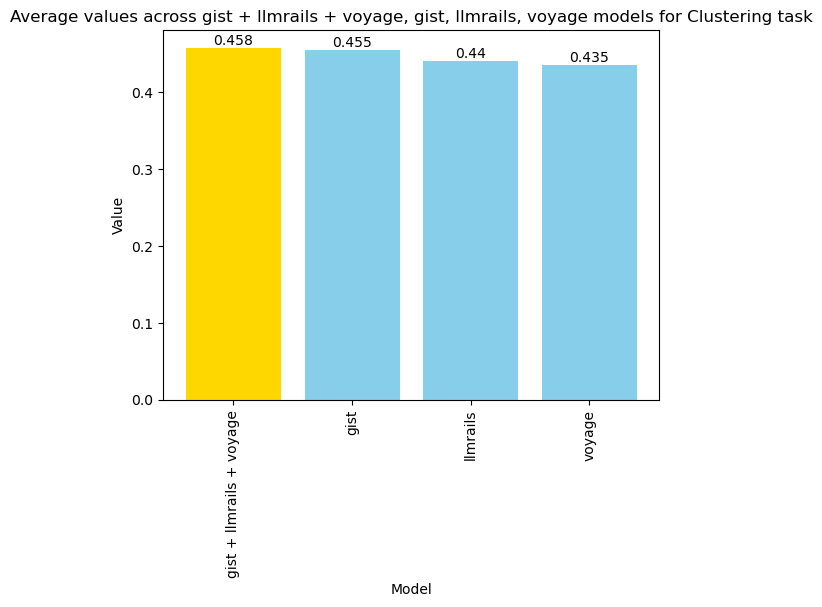

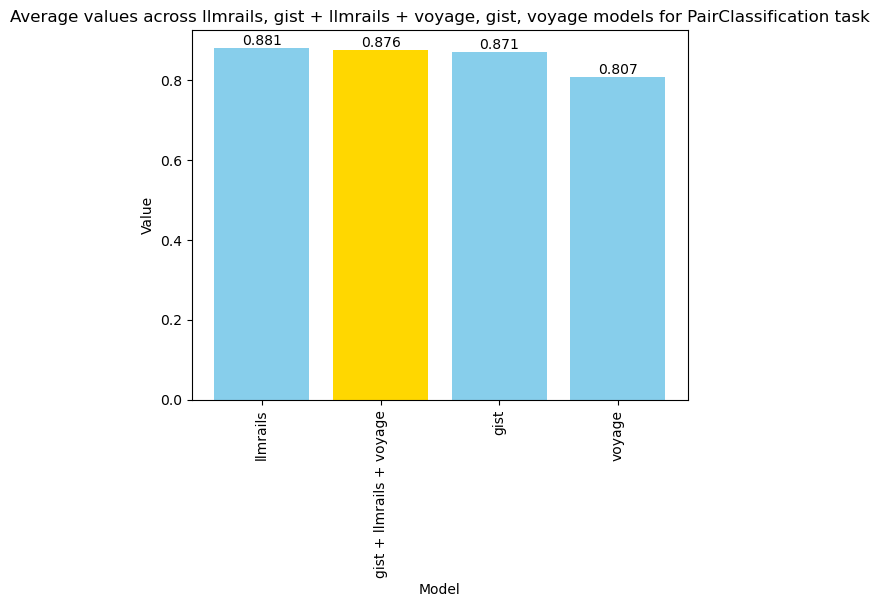

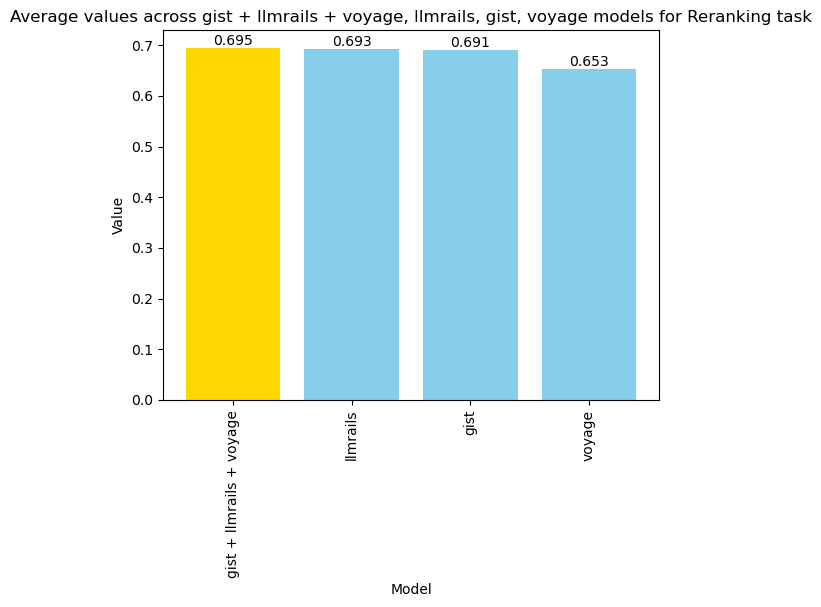

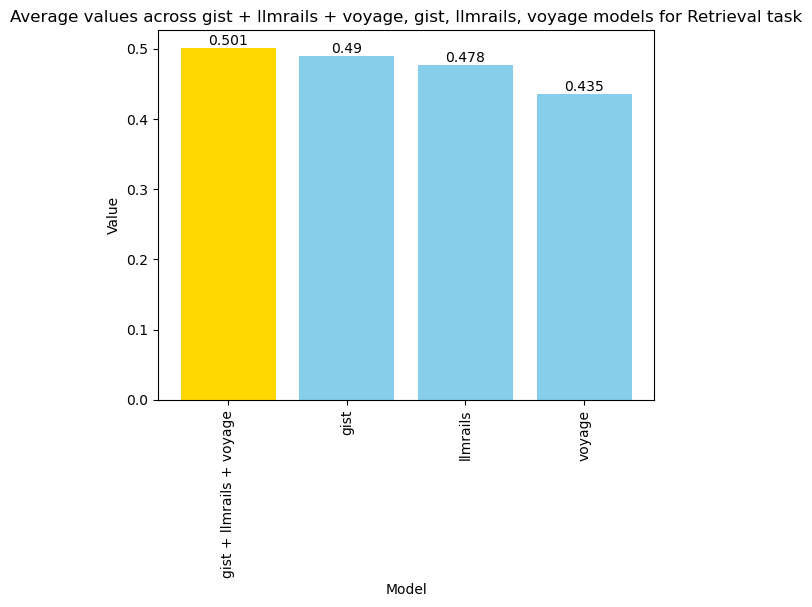

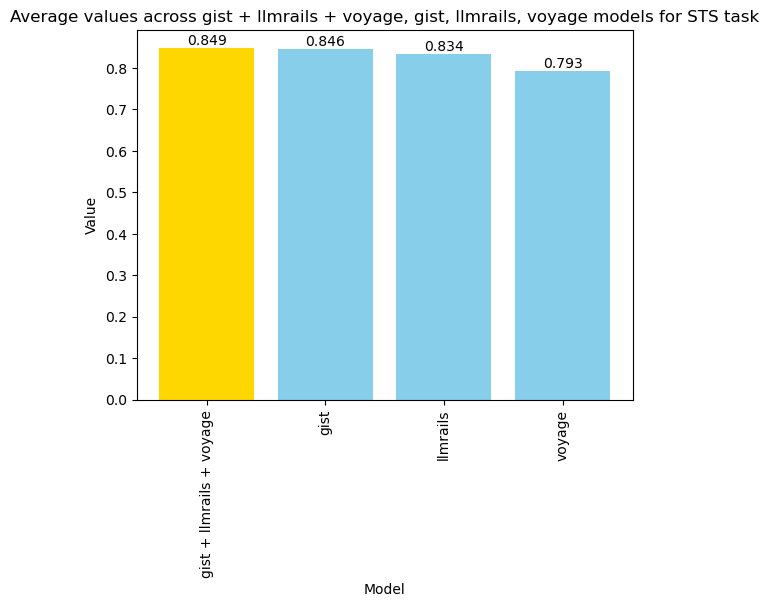

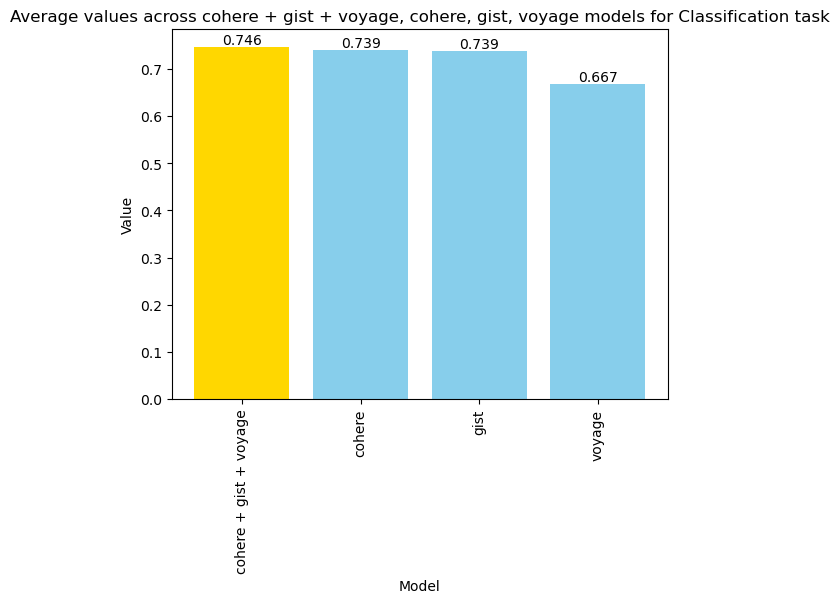

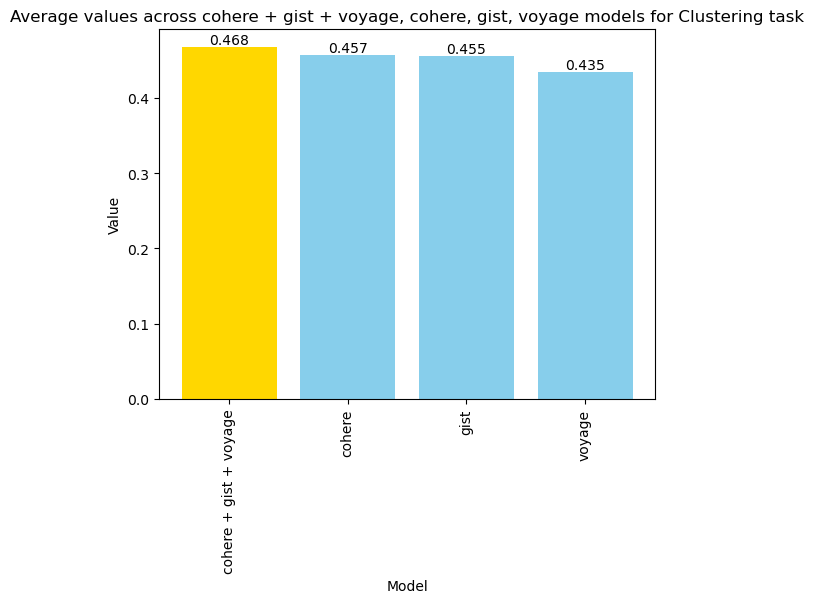

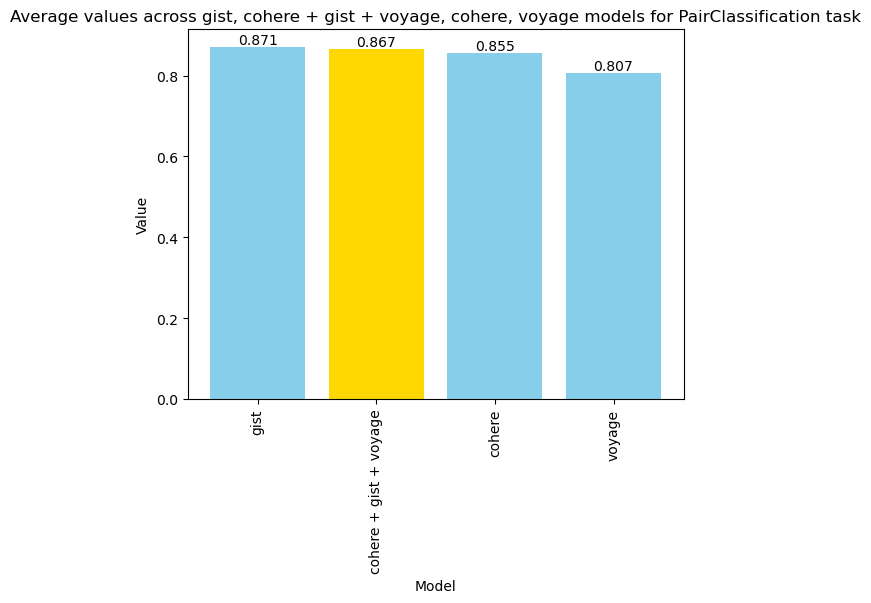

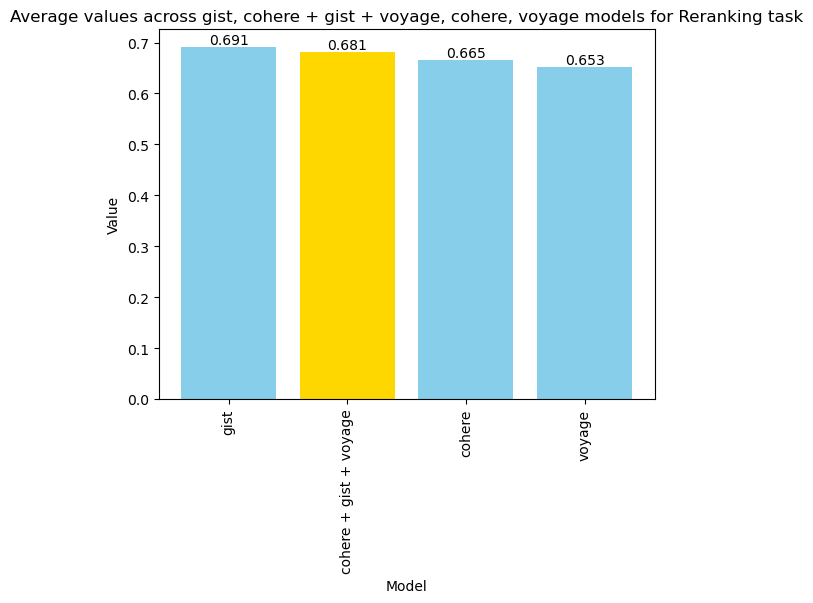

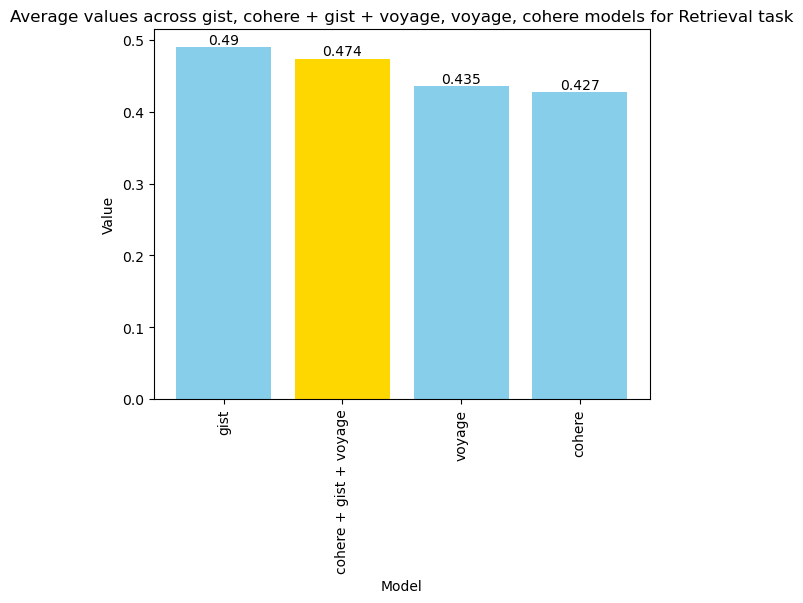

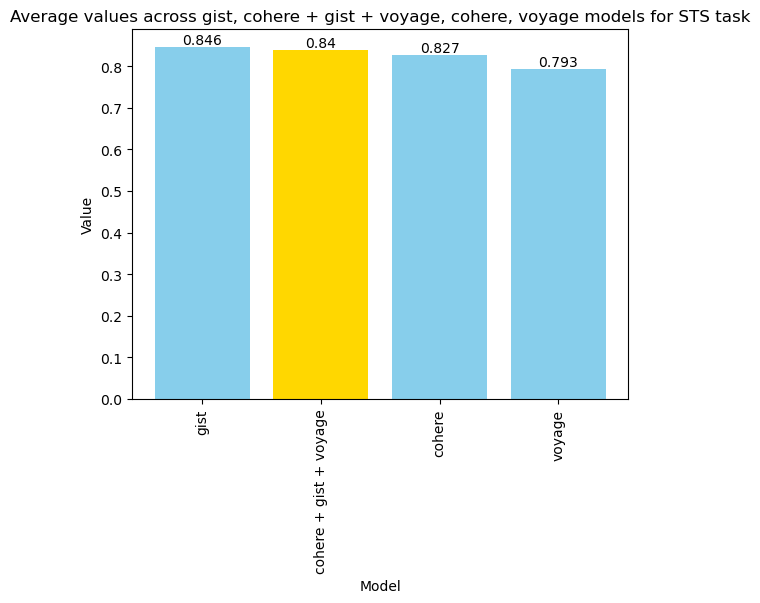

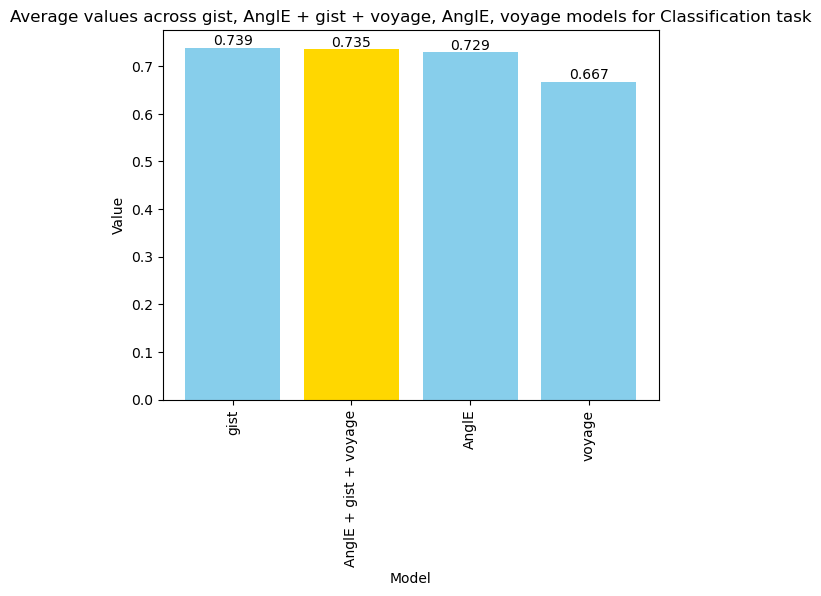

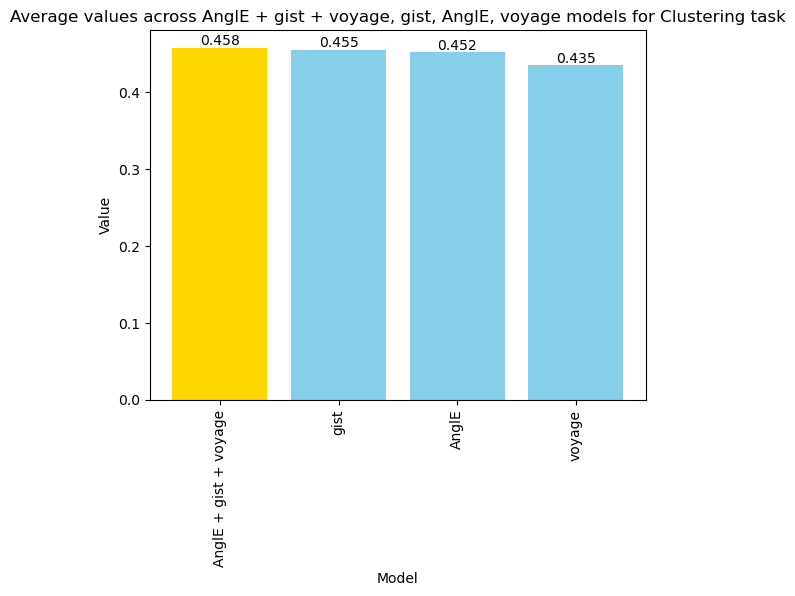

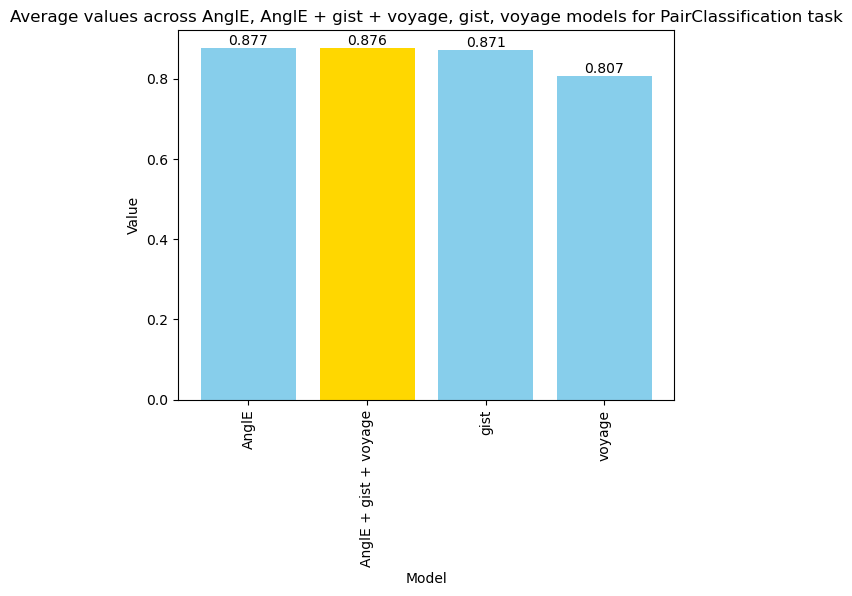

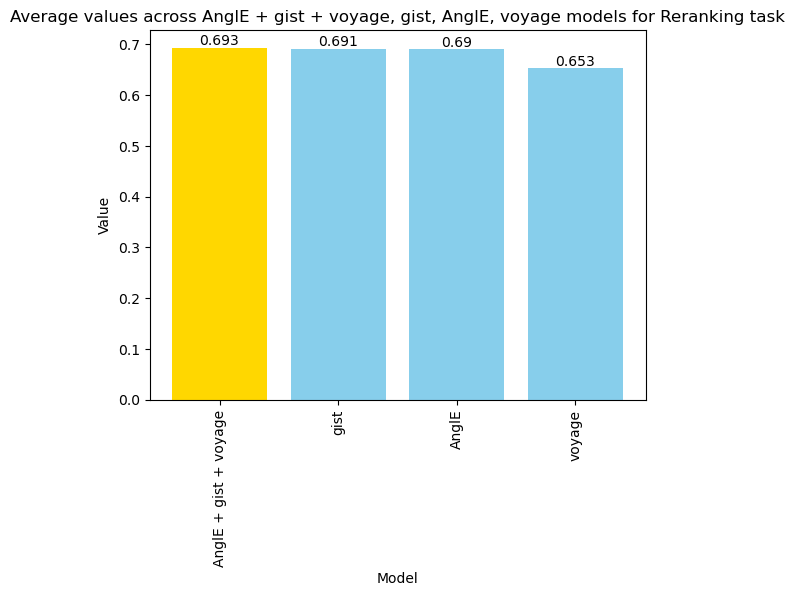

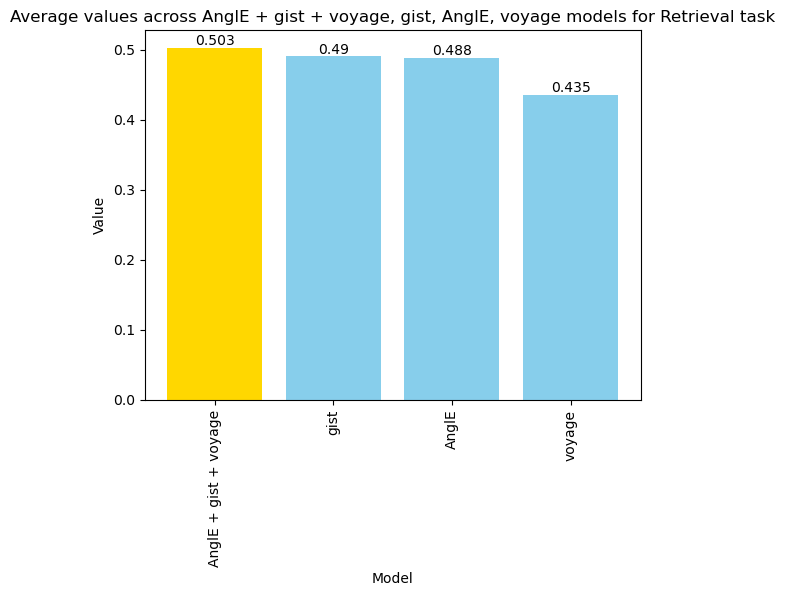

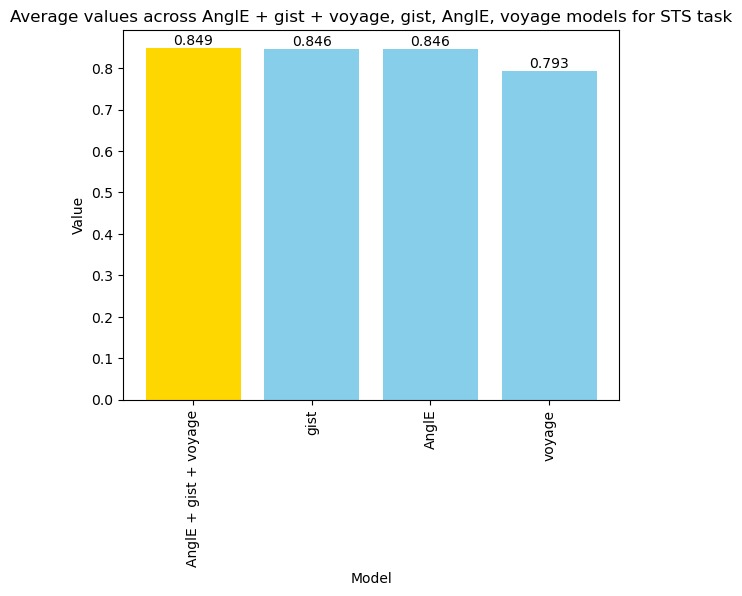

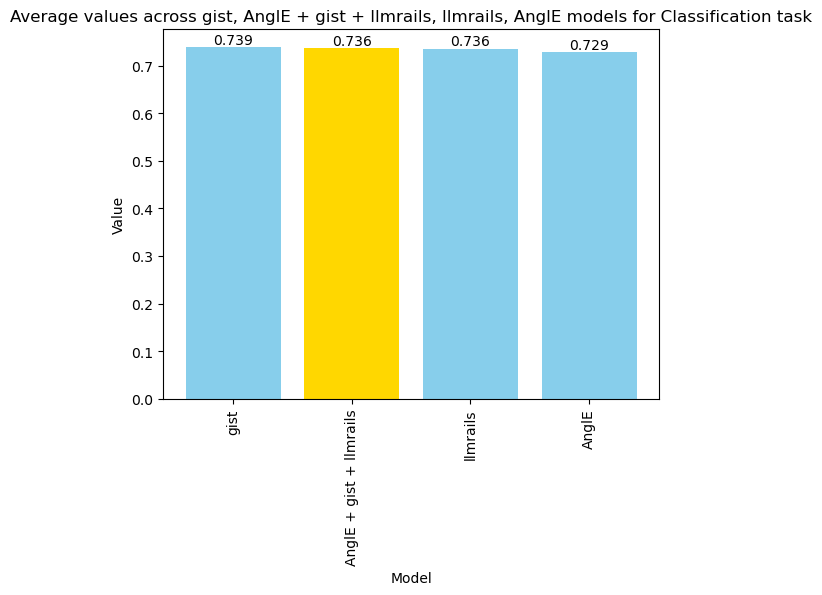

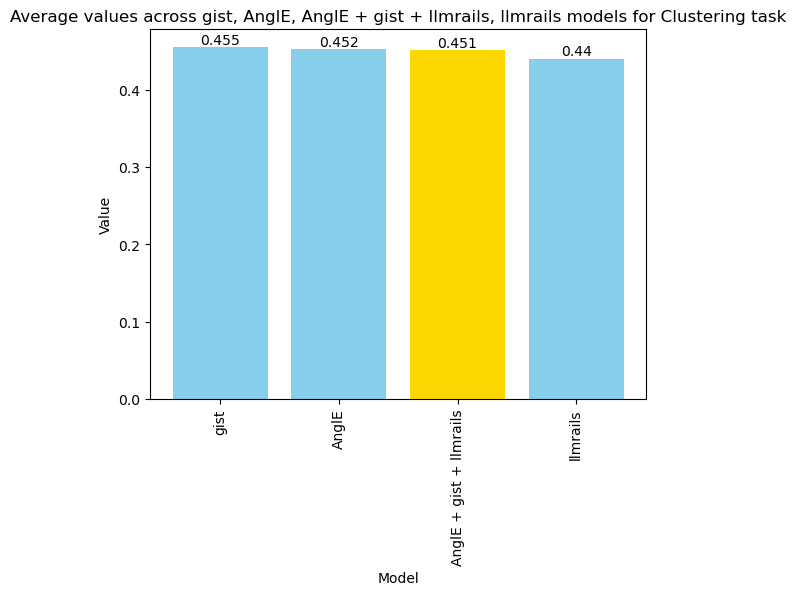

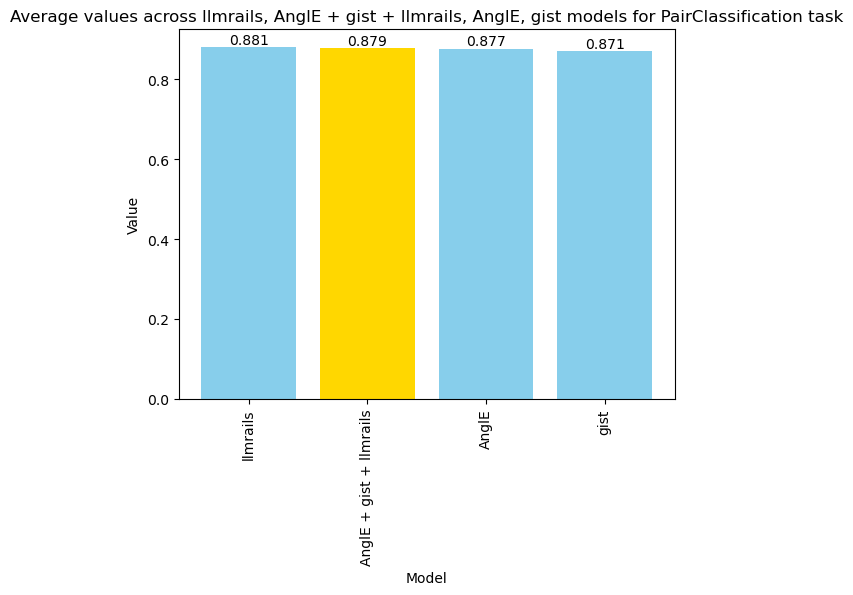

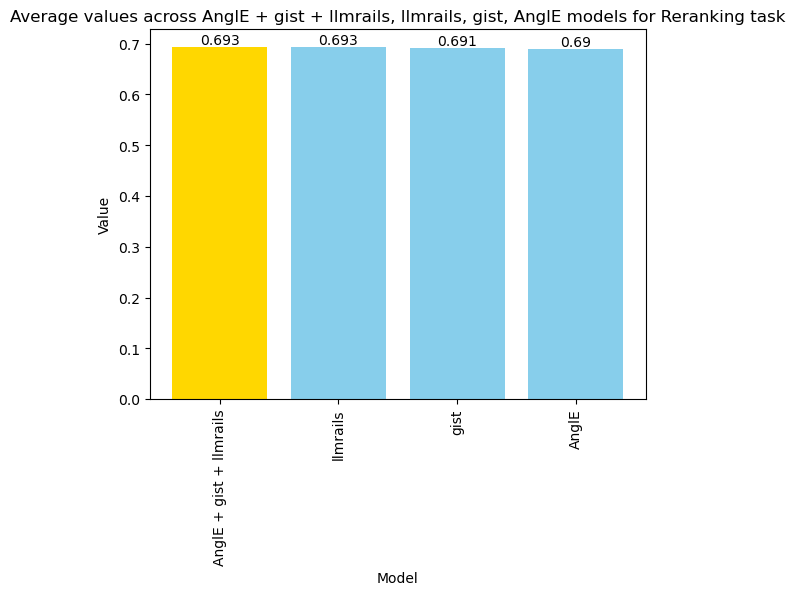

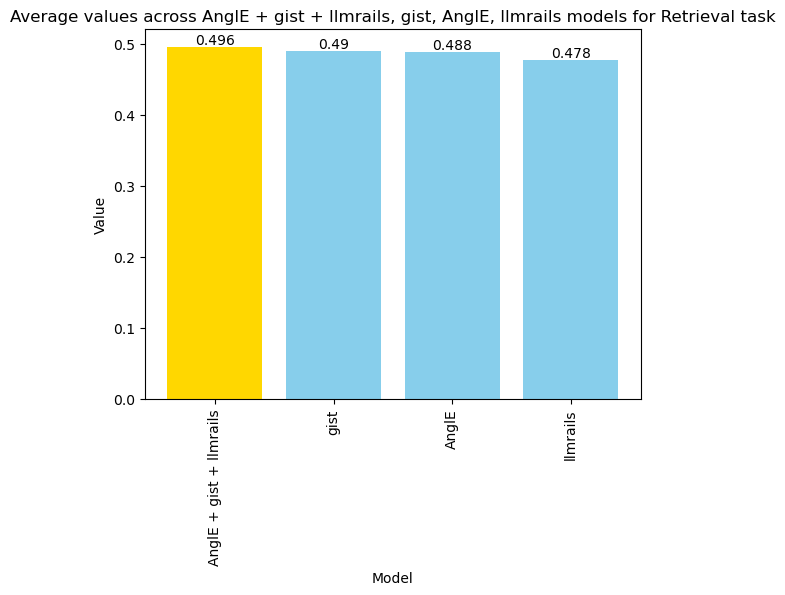

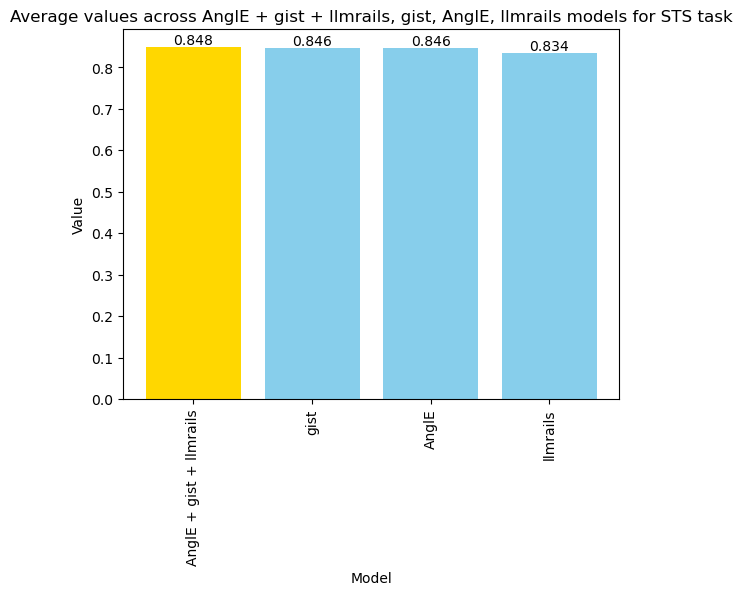

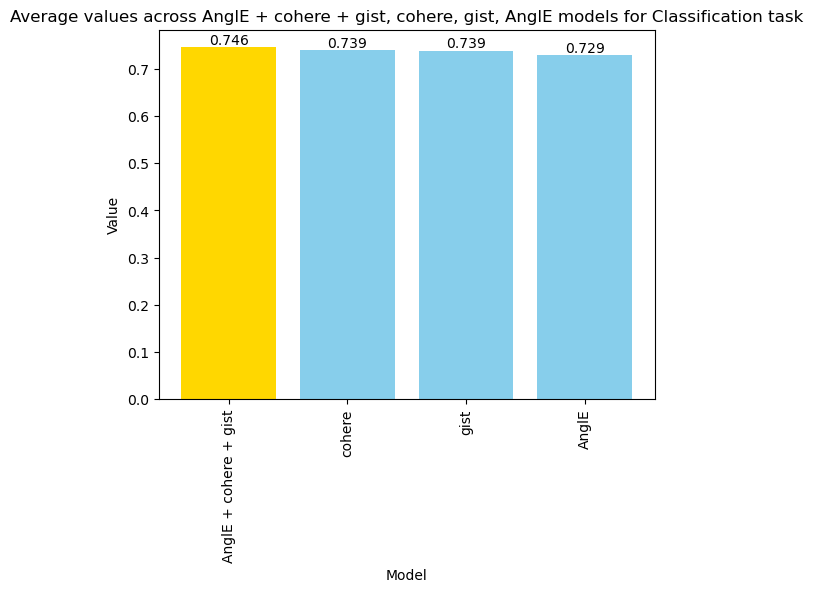

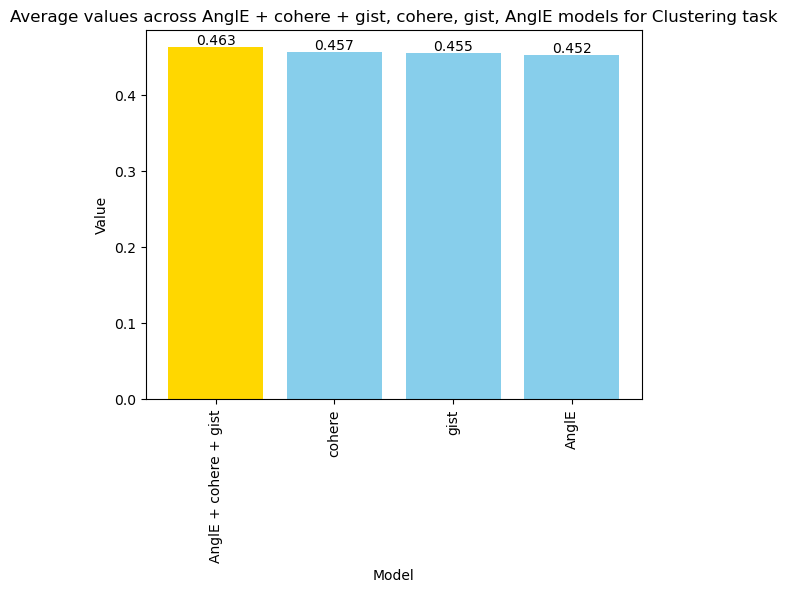

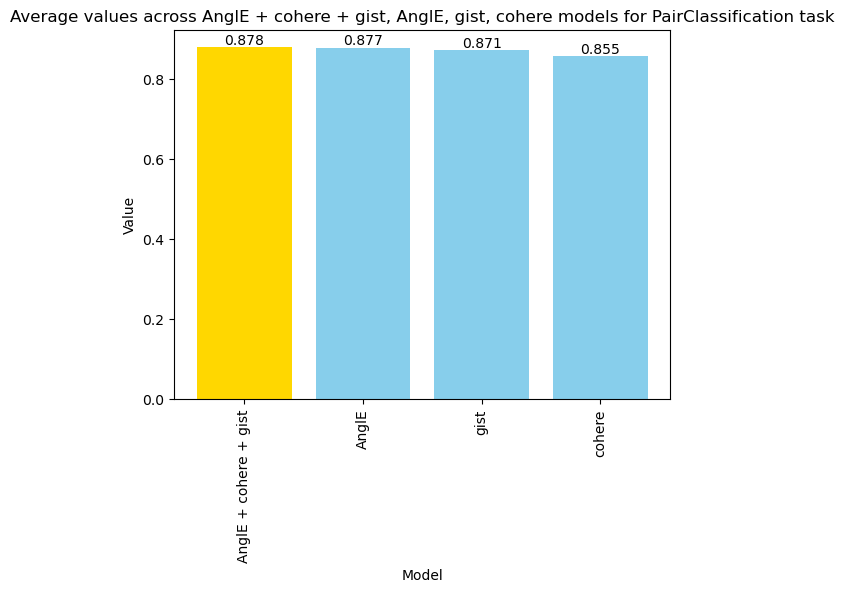

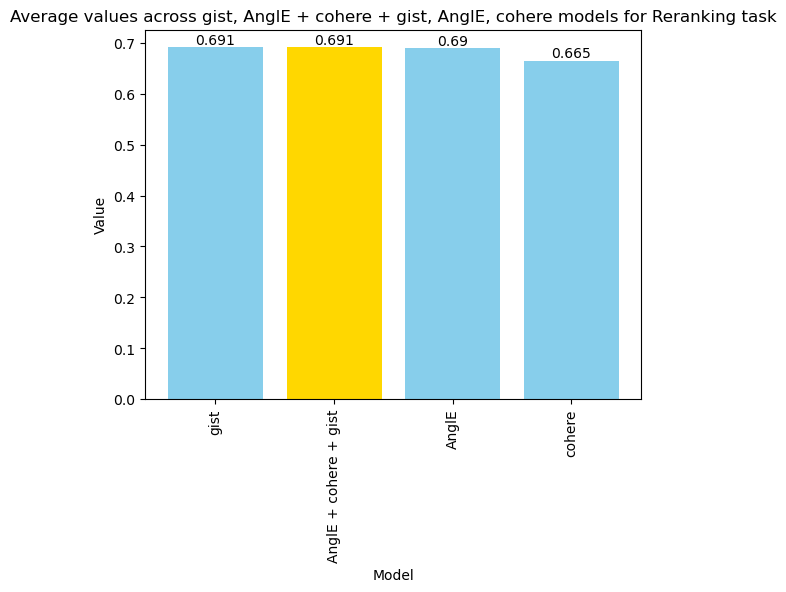

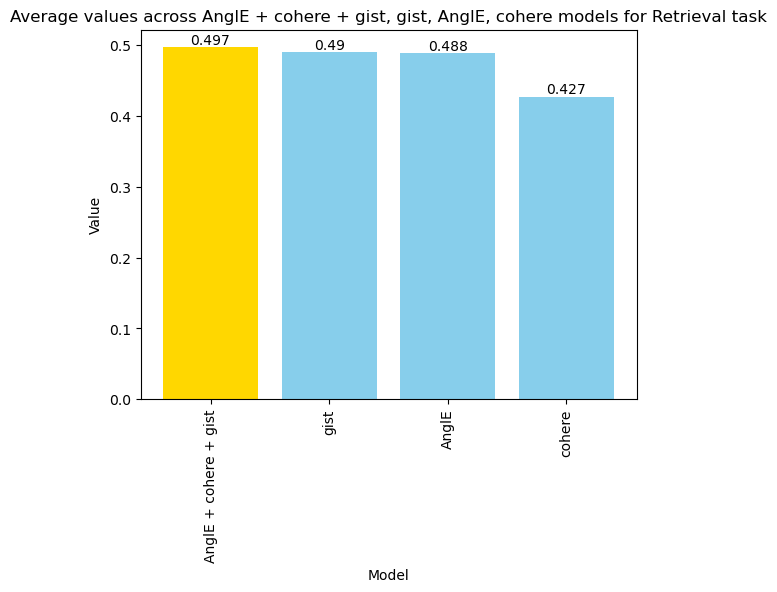

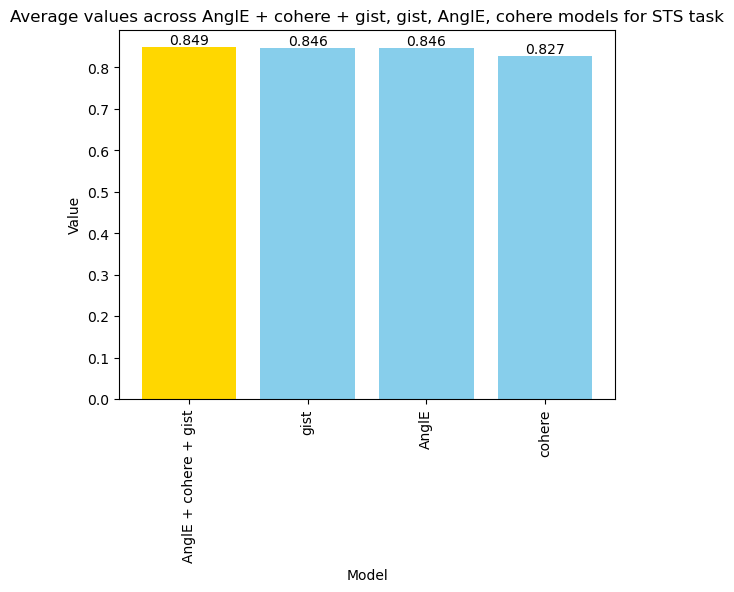

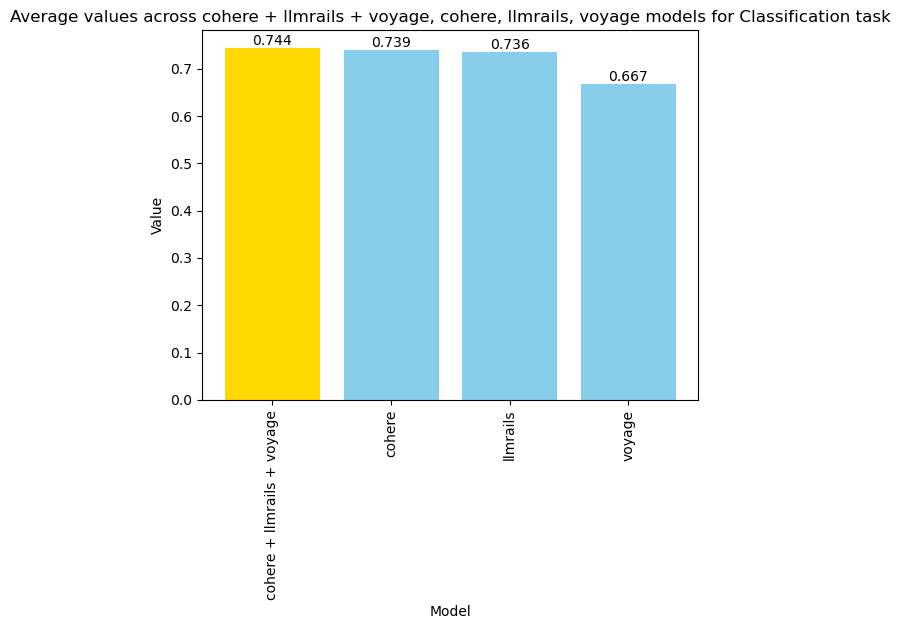

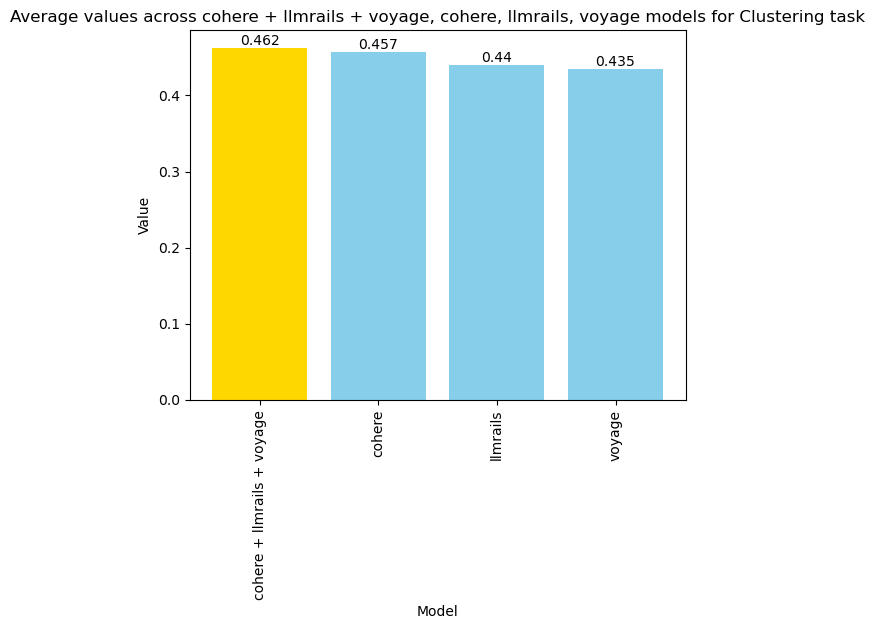

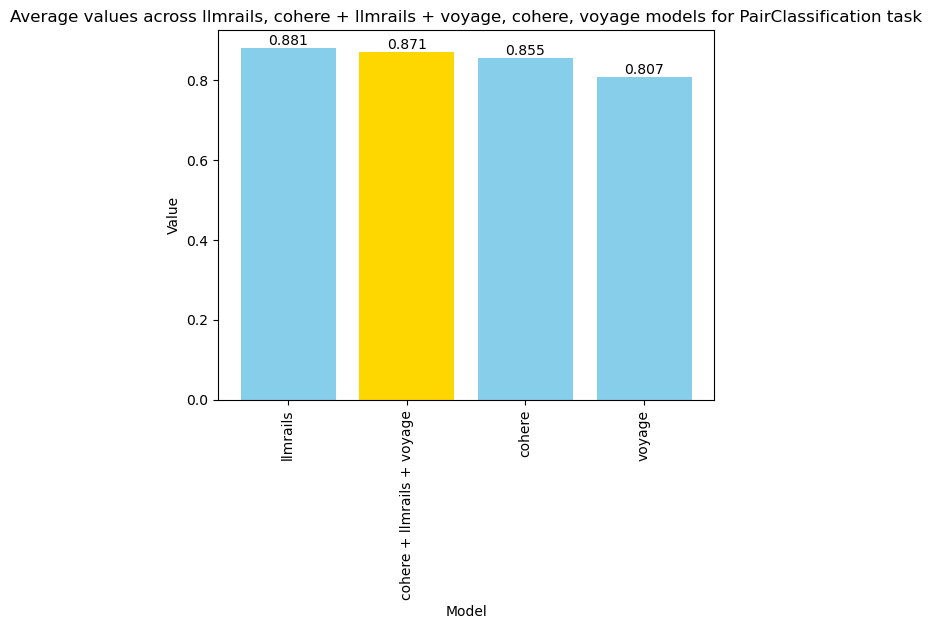

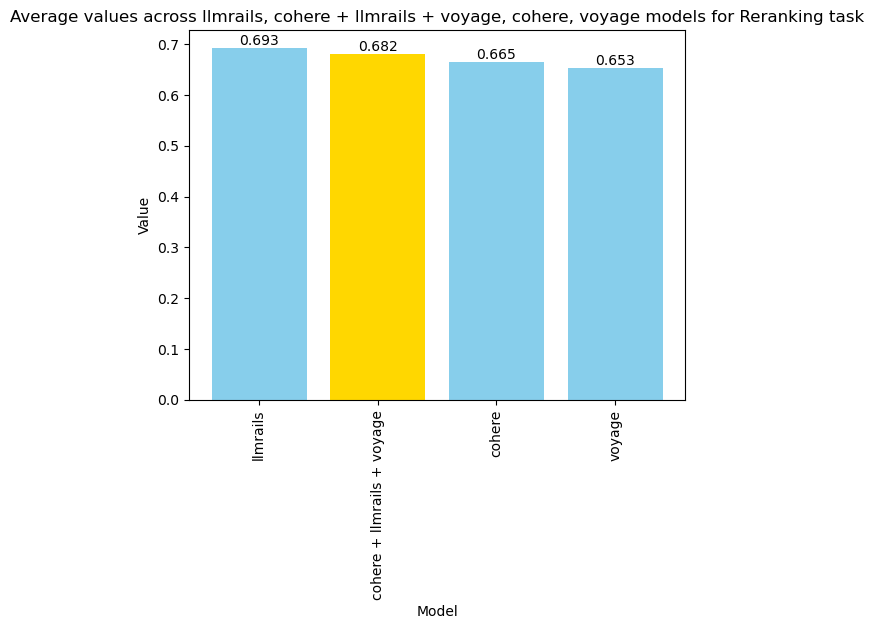

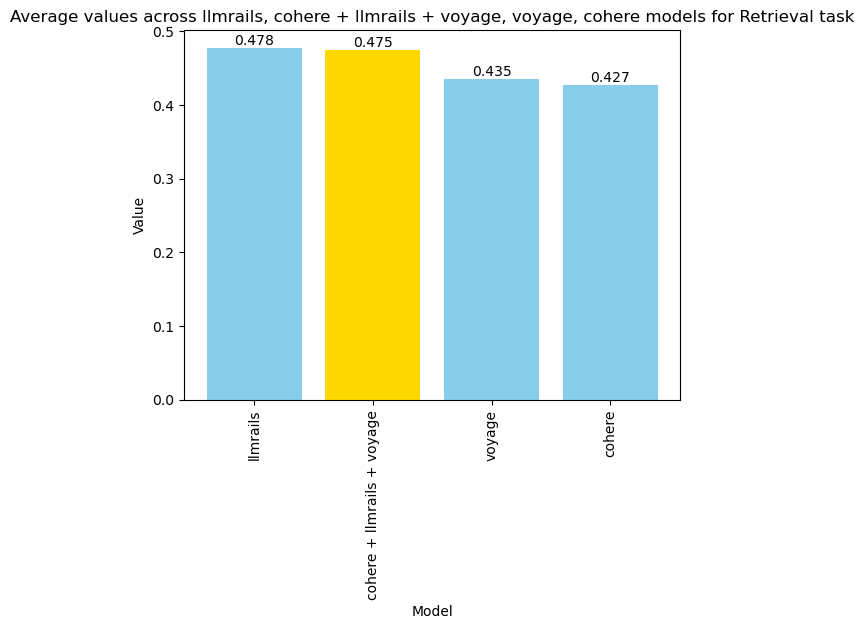

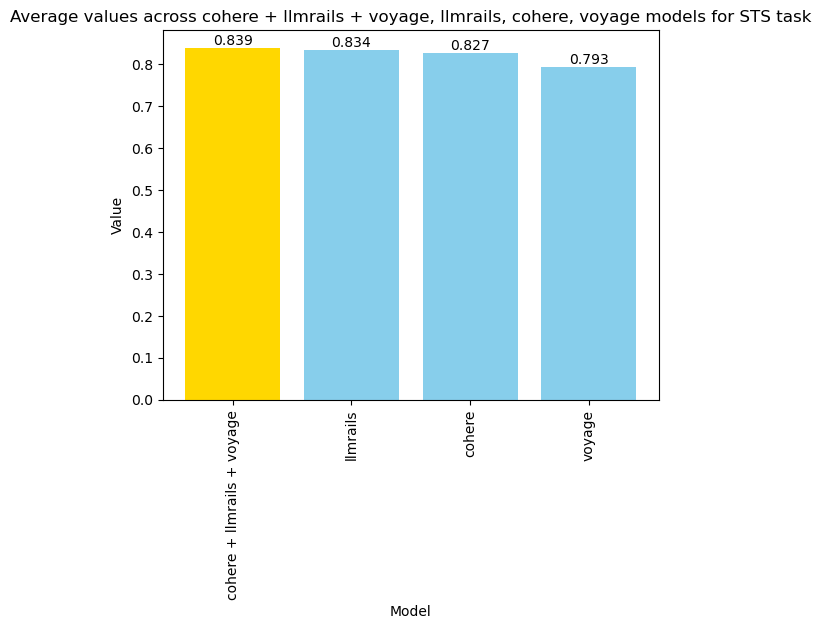

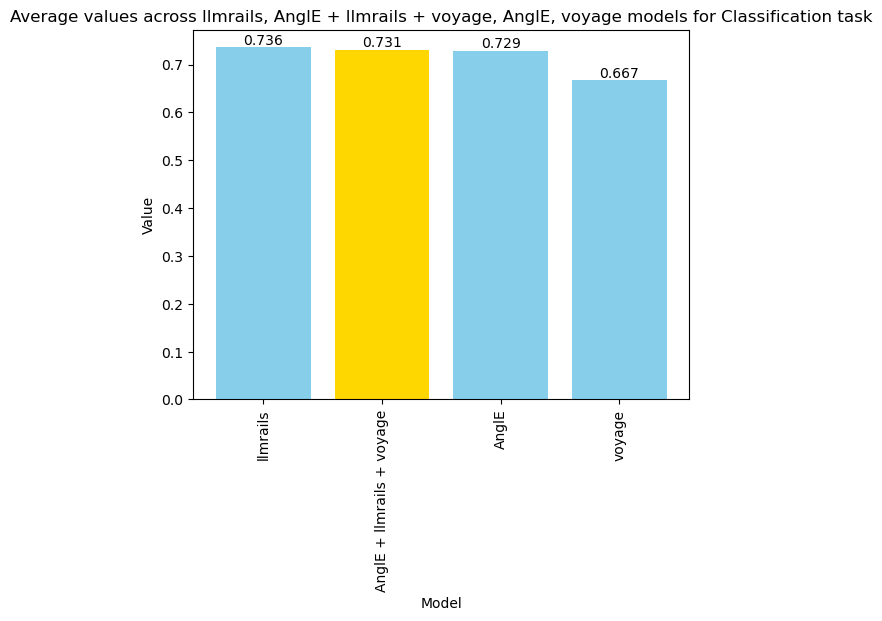

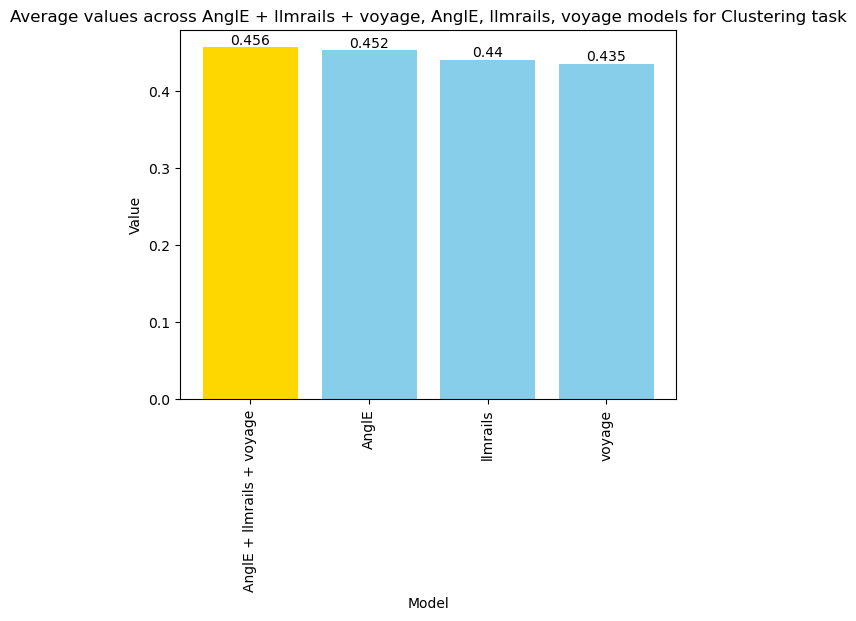

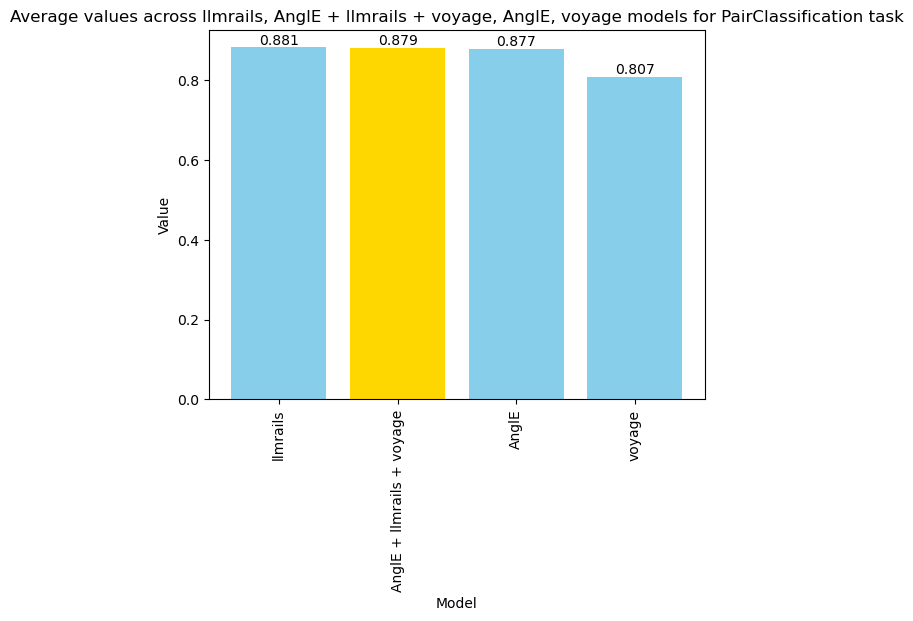

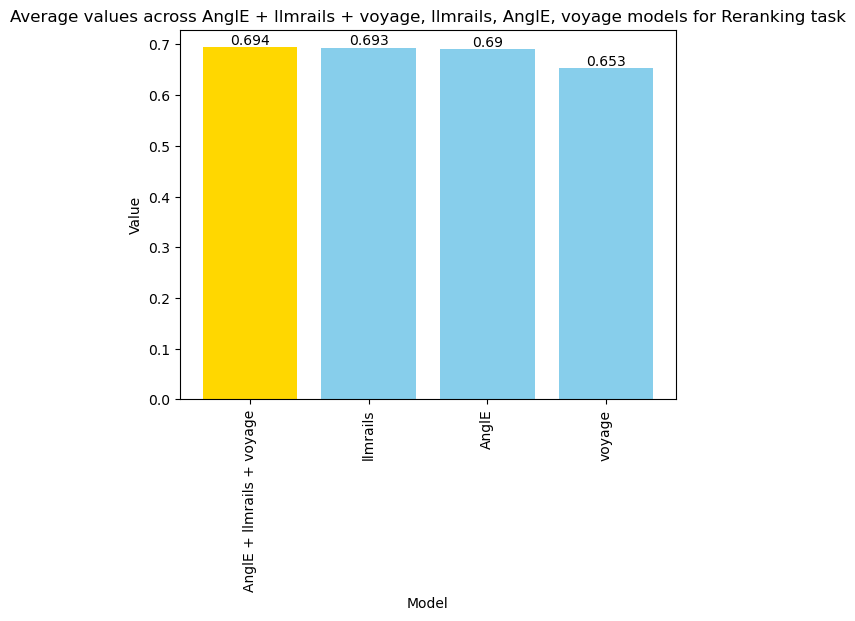

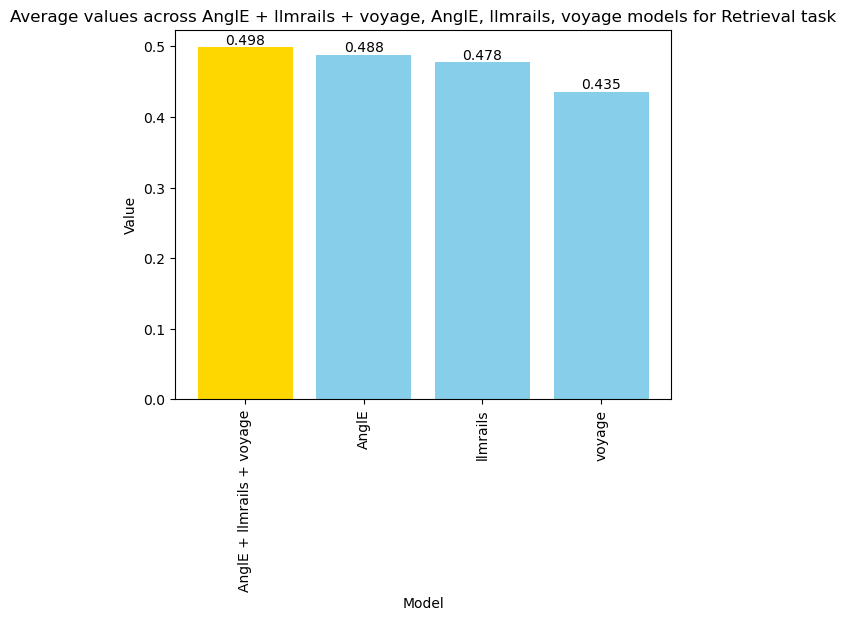

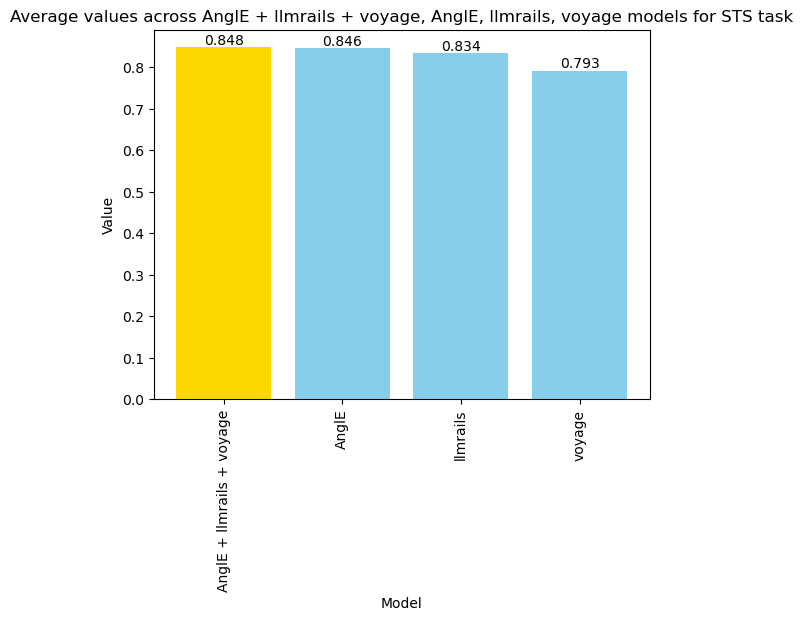

In [24]:
def plot_task_averages(df, tasks_to_not_show=[]):
    average_values = df.groupby(['model', 'task'])['value'].mean().reset_index()

    grouped_by_task = average_values.groupby('task').agg({
        'model': list,
        'value': list
    }).reset_index()
    task_scores = {}

    for i, row in grouped_by_task.iterrows():
        model_list = row['model']
        value_list = row['value']
        task = row['task']

        if task in tasks_to_not_show:
            continue

        combined = sorted(zip(model_list, value_list), reverse=True, key=lambda x: x[1])
        model_list, value_list = zip(*combined)

        colours = ['gold' if '$' in model else 'skyblue' for model in model_list]

        model_list = list(model_list)
        for i, model in enumerate(model_list):
            if '$' in model:
                lst = model.split('$')
                lst = [MODEL_LIST.get(l, l) for l in lst]
                model_list[i] = ' + '.join(lst)
            else:
                model_list[i] = MODEL_LIST.get(model, model)


        bars = plt.bar(model_list, value_list, color=colours)
        plt.xlabel('Model')
        plt.ylabel('Value')
        plt.title(f'Average values across {", ".join(model_list)} models for {task} task')
        plt.xticks(rotation=90)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom', ha='center')

        plt.show()

        task_scores[task] = list(zip(model_list, value_list))
        
    return task_scores
        
scores = []
for dataframe in df_list:
    model_scores_per_task = plot_task_averages(dataframe)
    scores.append(model_scores_per_task)

## Improvement of concatenated models per task

The cell below prints tables of the improvement of the score of the concatenated model from the average of the scores of the models it is made up by (for each task). Each score of the base model comes from the average of its scores on the subtasks for a task.

The tables are ordered to show the concat-models with the best improvement at the top.

In [25]:
all_task_scores = {i: [] for i in tasks_list}
for d in scores:
    for k, v in d.items():
        all_task_scores[k].append(v)
        
for task, s in all_task_scores.items():
    generate_table(s, f"Improvement when concatenated on task {task} (%)")


+------------------+----------------------------+-----------------------------------------------+
| Number of models |           Models           | Improvement when concatenated on task STS (%) |
+------------------+----------------------------+-----------------------------------------------+
|        2         |       AnglE + voyage       |               2.791150000000009               |
|        2         |     llmrails + voyage      |               2.6148999999999867              |
|        3         |  AnglE + cohere + voyage   |               2.6137333333333346              |
|        2         |       gist + voyage        |               2.490300000000012               |
|        3         |  gist + llmrails + voyage  |               2.431900000000009               |
|        3         | AnglE + llmrails + voyage  |               2.4083000000000188              |
|        3         | cohere + llmrails + voyage |               2.115933333333331               |
|        3         |

## Plot bar graphs per group of concat-model and its base models

The cell below generates bar graphs of the average values of a concat-model and its base models over all MTEB tasks.

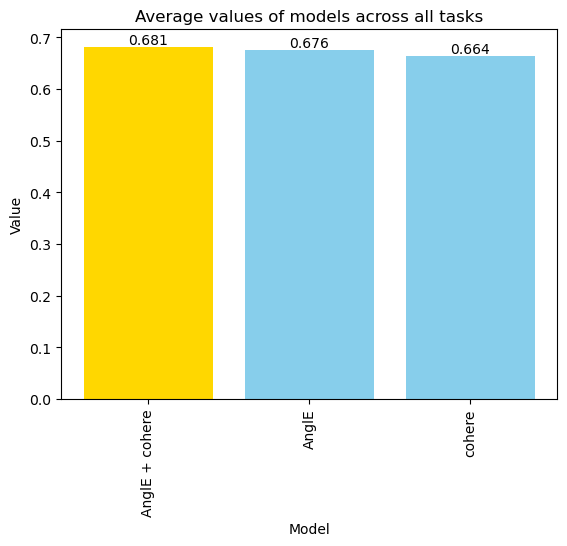

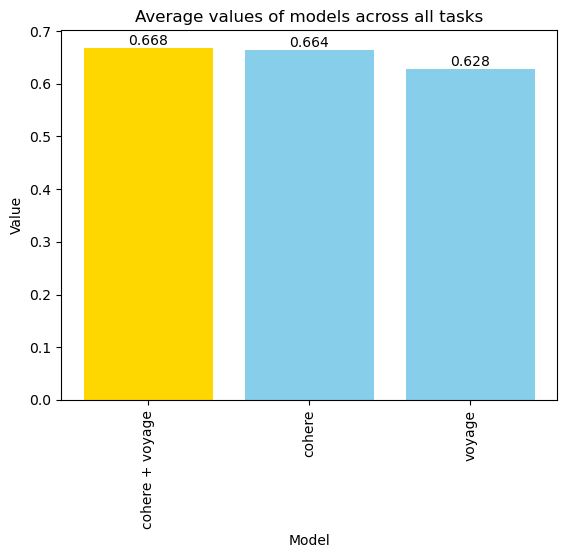

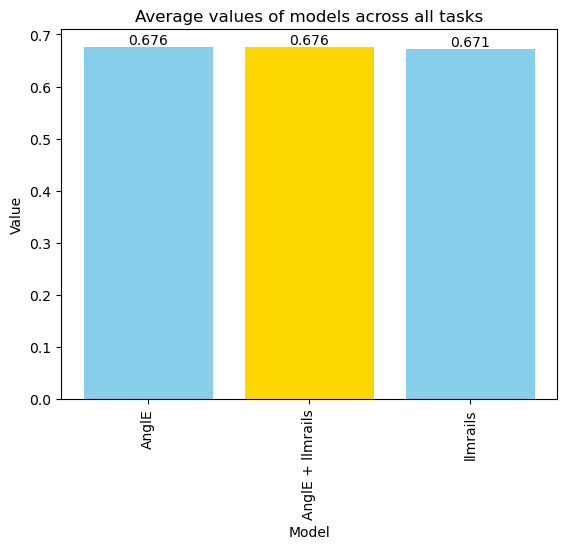

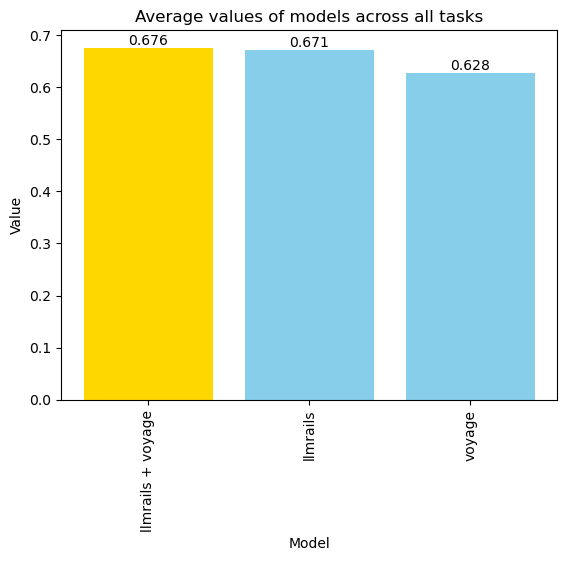

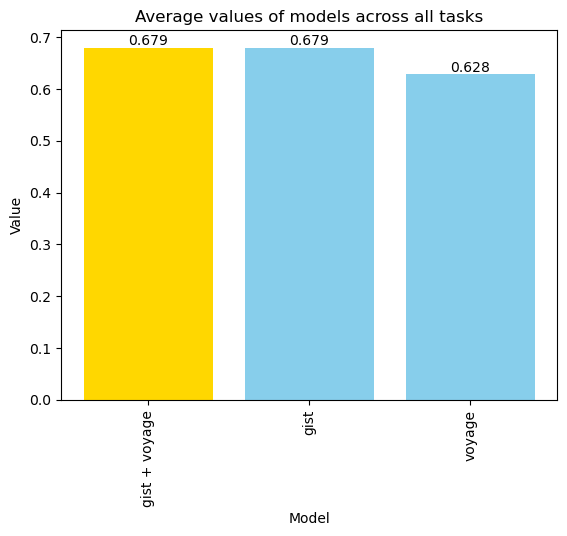

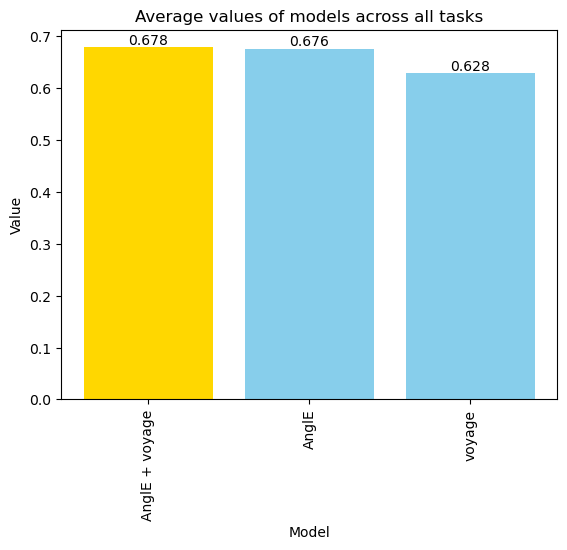

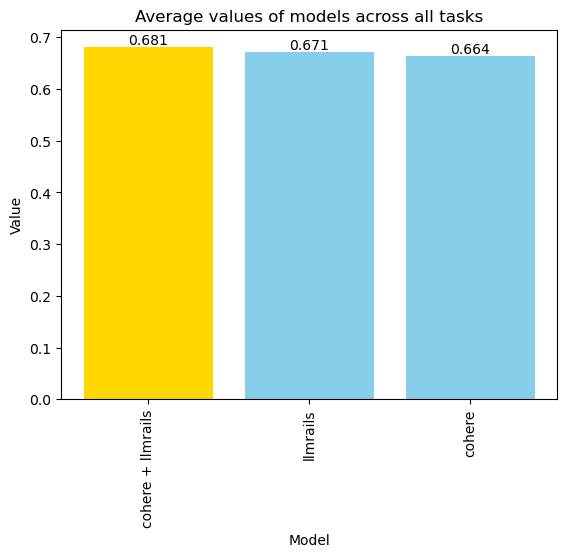

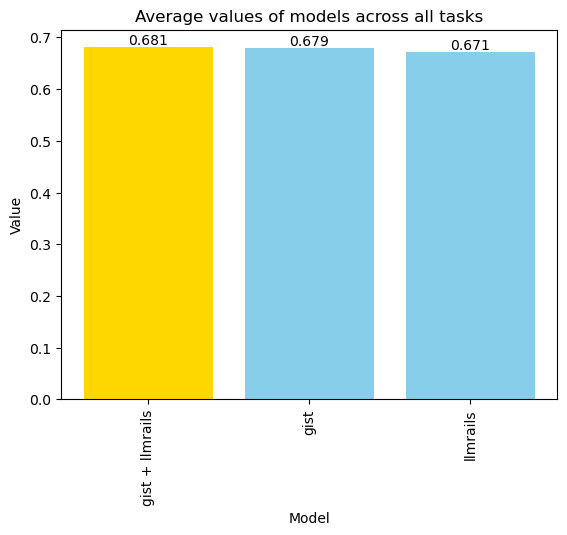

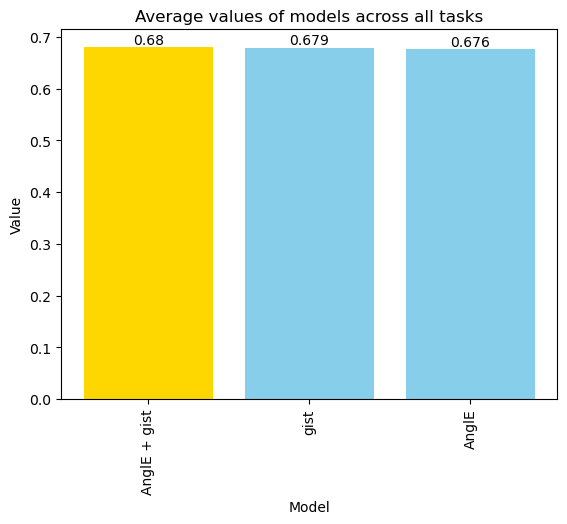

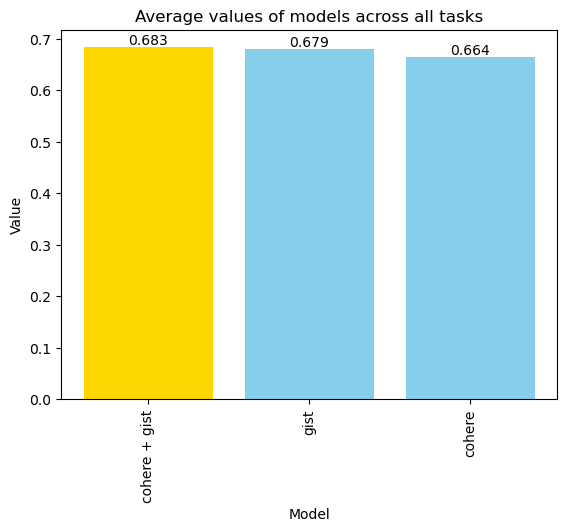

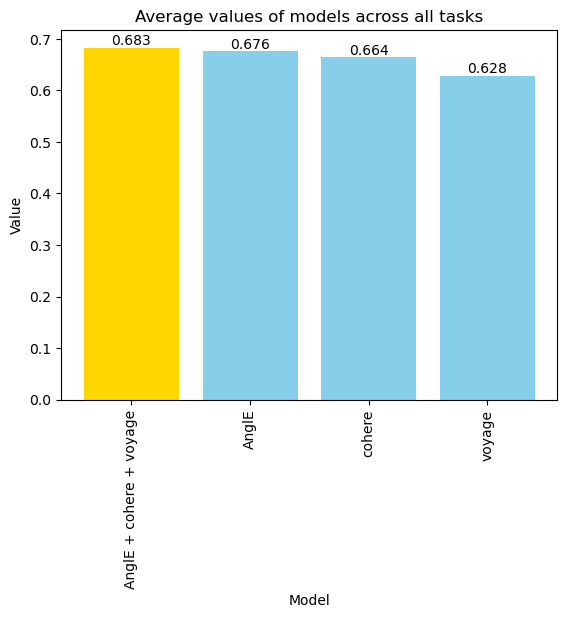

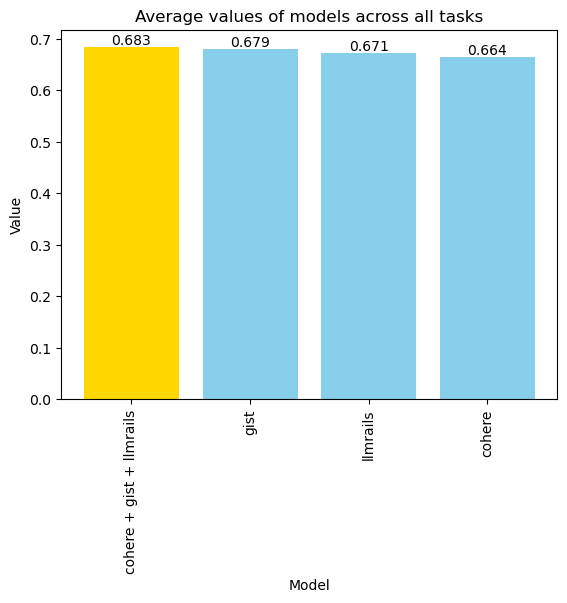

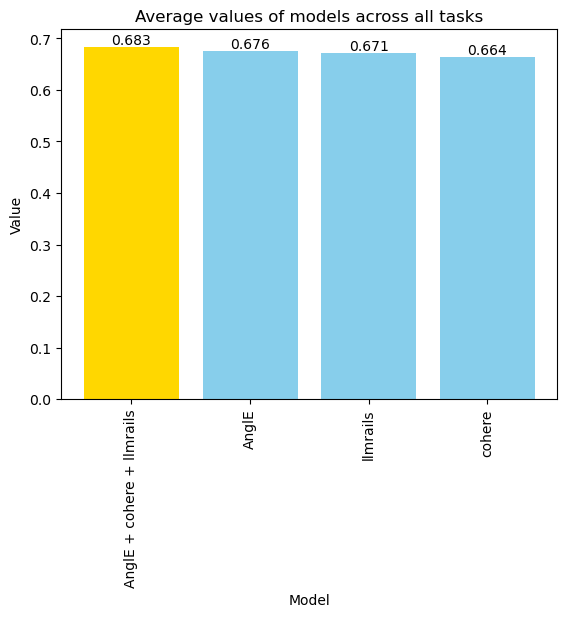

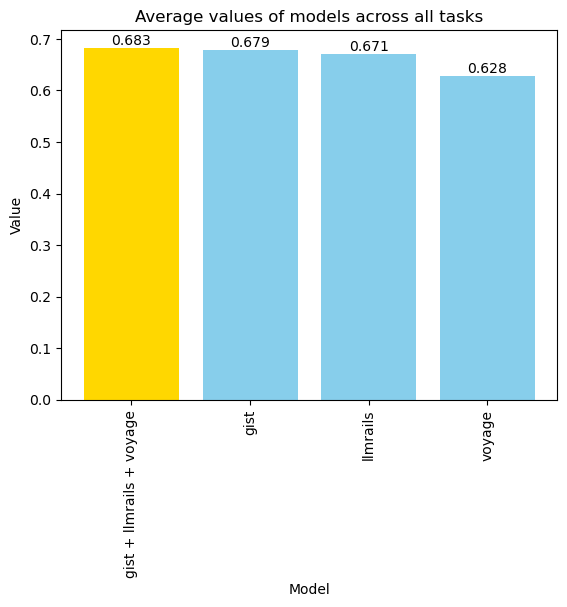

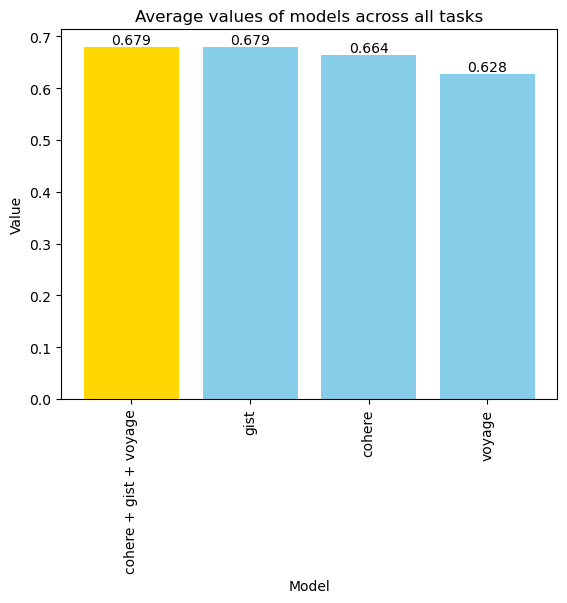

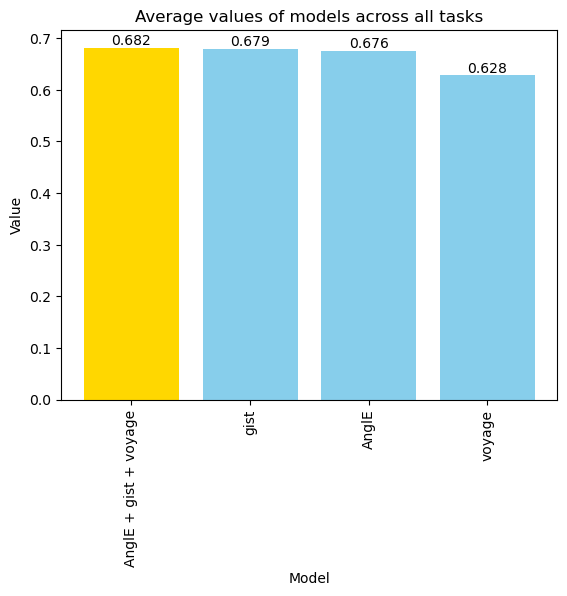

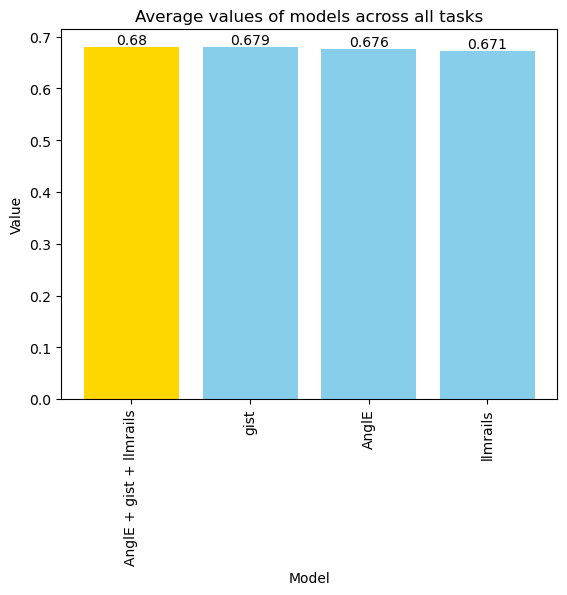

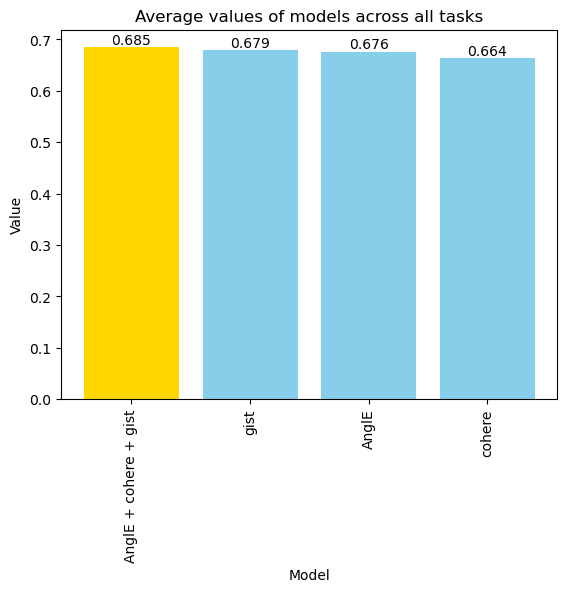

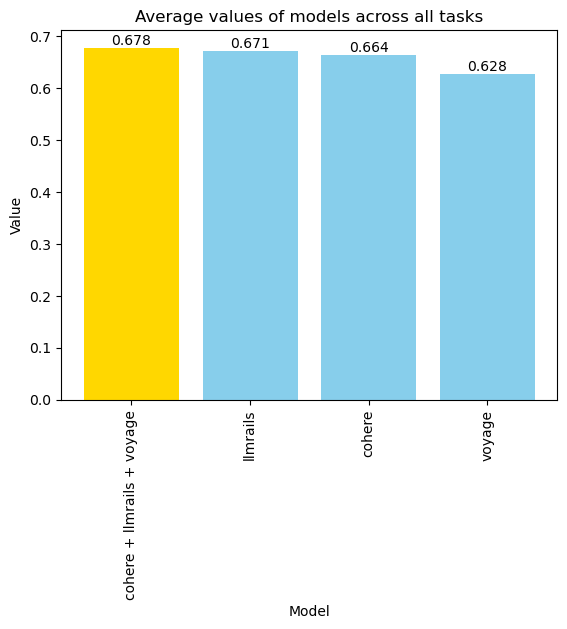

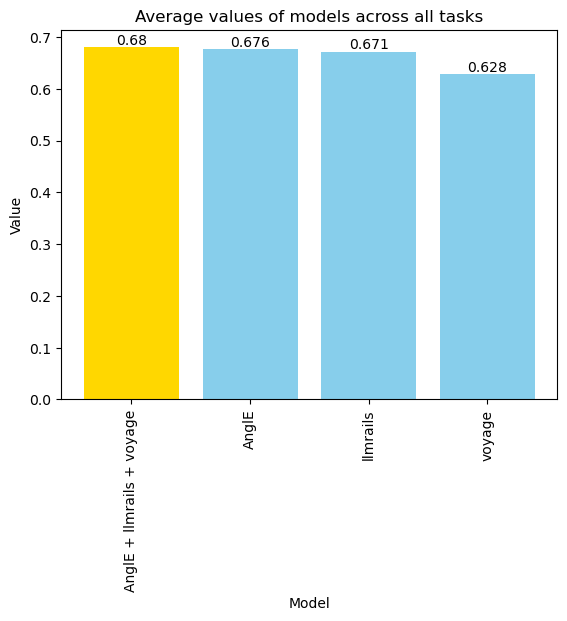

In [26]:
def plot_all_models(df):
    average_values = df.groupby(['model'])['value'].mean().reset_index()

    model_list = average_values['model'].tolist()
    value_list = average_values['value'].tolist()

    combined = sorted(zip(model_list, value_list), reverse=True, key=lambda x: x[1])
    model_list, value_list = zip(*combined)

    # Plotting the bar graph
    colours = ['gold' if '$' in model else 'skyblue' for model in model_list]

    model_list = list(model_list)
    for i, model in enumerate(model_list):
        if '$' in model:
            lst = model.split('$')
            lst = [MODEL_LIST.get(l, l) for l in lst]
            model_list[i] = ' + '.join(lst)
        else:
            model_list[i] = MODEL_LIST.get(model, model)

    bars = plt.bar(model_list, value_list, color=colours)
    plt.xlabel('Model')
    plt.ylabel('Value')
    plt.title(f'Average values of models across all tasks')
    plt.xticks(rotation=90)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom', ha='center')
    
    plt.show()
    return list(zip(model_list, value_list))

scores = []
for dataframe in df_list:
    score = plot_all_models(dataframe)
    scores.append(score)

## Improvement of concatenated models

The cell below prints a table of the improvement of the score of the concatenated model from the average of the scores of the models it is made up by. Each score of the base model comes from the average of its scores on the MTEB tasks.

The table is ordered to show the concat-models with the best improvement at the top.

In [27]:
generate_table(scores, "Average improvement when concatenated (%)")

+------------------+----------------------------+-------------------------------------------+
| Number of models |           Models           | Average improvement when concatenated (%) |
+------------------+----------------------------+-------------------------------------------+
|        3         |  AnglE + cohere + voyage   |             2.6968717948717913            |
|        2         |       AnglE + voyage       |             2.6147820512820497            |
|        2         |     llmrails + voyage      |             2.598410256410244             |
|        2         |       gist + voyage        |             2.5697692307692366            |
|        3         | cohere + llmrails + voyage |             2.334008547008548             |
|        3         |  gist + llmrails + voyage  |             2.3107777777777727            |
|        2         |      cohere + voyage       |             2.2313076923076935            |
|        3         |   cohere + gist + voyage   |           

## Internal MTEB leaderboard

The cell below prints a table of scores per task for each base-model and concat-model. The table is in order of highest to lowest average scores for all the MTEB tasks.

In [28]:
from prettytable import PrettyTable

def generate_table(df):
    task_list = sorted(df['task'].unique().tolist())
    table = PrettyTable(["Model name", "Dimension", 'Average value'] + task_list)
    models = {}
    for _, row in df.iterrows():
        model = row['model']
        task = row['task']
        value = row['value']

        if model not in models:
            models[model] = {}
        
        if task not in models[model]:
            models[model][task] = [1, value]
        else:
            models[model][task][0] += 1
            models[model][task][1] += value

    for model, task_dict in models.items():
        row = [model, (model.count('$')+1)*1024]
        sorted_vals = sorted(task_dict.items(), key=lambda x: x[0])

        sums = 0
        count = 0
        for task, val in sorted_vals:
            sums += val[1]
            count += val[0]

        average = sums/count

        i = 0
        vals = []
        for task_name, val in sorted_vals:
            count, value = val
            if task_name != task_list[i]:
                vals.append(0)
                i+= 1
            i += 1
            vals.append(value/count)

        vals = [np.round(val,3) for val in vals]
        table.add_row(row + [average] + vals)

    table.reversesort = True
    table.sortby = 'Average value'

    return table

table = generate_table(df)
print(table)

+------------------------+-----------+--------------------+----------------+------------+--------------------+-----------+-----------+-------+
|       Model name       | Dimension |   Average value    | Classification | Clustering | PairClassification | Reranking | Retrieval |  STS  |
+------------------------+-----------+--------------------+----------------+------------+--------------------+-----------+-----------+-------+
|   angle$cohere$gist    |    3072   |       0.6848       |     0.746      |   0.463    |       0.878        |   0.691   |   0.497   | 0.849 |
| angle$cohere$llmrails  |    3072   | 0.6832023076923076 |     0.743      |   0.459    |       0.881        |   0.692   |   0.496   | 0.848 |
|  cohere$gist$llmrails  |    3072   | 0.6829607692307692 |     0.751      |   0.465    |       0.874        |   0.685   |   0.483   | 0.844 |
|      cohere$gist       |    2048   | 0.6829425641025642 |     0.751      |   0.466    |       0.871        |   0.685   |   0.481   | 0.844 |